# Submitted By:
**Zanib Latif** - **Student ID:1131898**

**Manoj Sangita** - **Student ID:**

**Group 8**

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, MaxPool1D, add, AveragePooling1D
import tensorflow as tf
from tensorflow.keras import models, optimizers as opts
from keras.models import Sequential
from keras.optimizers import adam_v2
from keras.callbacks import EarlyStopping
from keras.layers import ELU
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Nadam
from keras.layers import Dense, Activation
from keras.activations import relu, sigmoid

In [2]:
# Sklearn imports 
from sklearn import model_selection
from sklearn.metrics import average_precision_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn import metrics
#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVR
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from numpy import sqrt 
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import classification_report,confusion_matrix 
import time

In [3]:
from google.colab import drive
import datetime as dt
drive.mount('/content/gdrive')


#Importing necessary libraries

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
df = pd.read_csv('gdrive/MyDrive/measures_v2.csv')
#Reading the csv file

In [ ]:
df.head()
#Checking the top header of the dataframe

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


In [ ]:
print(df.dtypes);
#Checking the data types of all the columns in the dataframe

u_q               float64
coolant           float64
stator_winding    float64
u_d               float64
stator_tooth      float64
motor_speed       float64
i_d               float64
i_q               float64
pm                float64
stator_yoke       float64
ambient           float64
torque            float64
profile_id          int64
dtype: object


In [ ]:
df.count()
#Checking the count of all columns in the dataframe

u_q               1330816
coolant           1330816
stator_winding    1330816
u_d               1330816
stator_tooth      1330816
motor_speed       1330816
i_d               1330816
i_q               1330816
pm                1330816
stator_yoke       1330816
ambient           1330816
torque            1330816
profile_id        1330816
dtype: int64

In [ ]:
df.isnull().values.any()
#Checking if there are any null values in all the columns of the dataframe

False

In [ ]:
df.describe()
#Basic mathematical description of all the columns in the data frame

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06
mean,5.427900e+01,3.622999e+01,6.634275e+01,-2.513381e+01,5.687858e+01,2.202081e+03,-6.871681e+01,3.741278e+01,5.850678e+01,4.818796e+01,2.456526e+01,3.110603e+01,4.079306e+01
std,4.417323e+01,2.178615e+01,2.867206e+01,6.309197e+01,2.295223e+01,1.859663e+03,6.493323e+01,9.218188e+01,1.900150e+01,1.999100e+01,1.929522e+00,7.713575e+01,2.504549e+01
min,-2.529093e+01,1.062375e+01,1.858582e+01,-1.315304e+02,1.813398e+01,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.085696e+01,1.807669e+01,8.783478e+00,-2.464667e+02,2.000000e+00
25%,1.206992e+01,1.869814e+01,4.278796e+01,-7.869090e+01,3.841601e+01,3.171107e+02,-1.154061e+02,1.095863e+00,4.315158e+01,3.199033e+01,2.318480e+01,-1.374265e-01,1.700000e+01
50%,4.893818e+01,2.690014e+01,6.511013e+01,-7.429755e+00,5.603635e+01,1.999977e+03,-5.109376e+01,1.577401e+01,6.026629e+01,4.562551e+01,2.479733e+01,1.086035e+01,4.300000e+01
75%,9.003439e+01,4.985749e+01,8.814114e+01,1.470271e+00,7.558668e+01,3.760639e+03,-2.979688e+00,1.006121e+02,7.200837e+01,6.146083e+01,2.621702e+01,9.159718e+01,6.500000e+01
max,1.330370e+02,1.015985e+02,1.413629e+02,1.314698e+02,1.119464e+02,6.000015e+03,5.189670e-02,3.017079e+02,1.136066e+02,1.011480e+02,3.071420e+01,2.610057e+02,8.100000e+01


Text(0, 0.5, 'Time in hours')

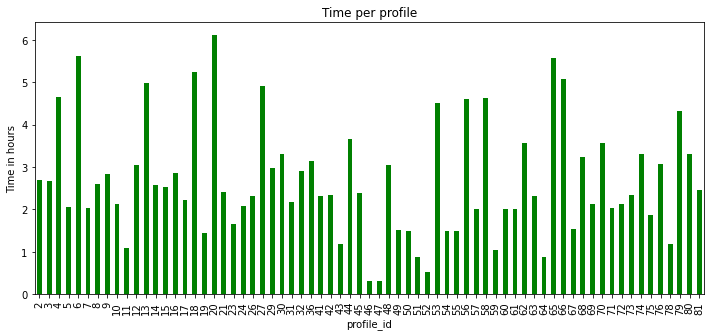

In [ ]:
sessions = df.groupby('profile_id').agg('count')['u_d'] / (2 * 3600)
sessions.plot.bar(figsize=(12,5), title='Time per profile',color='g')
plt.ylabel('Time in hours')

Text(0.5, 0, 'Time (hr)')

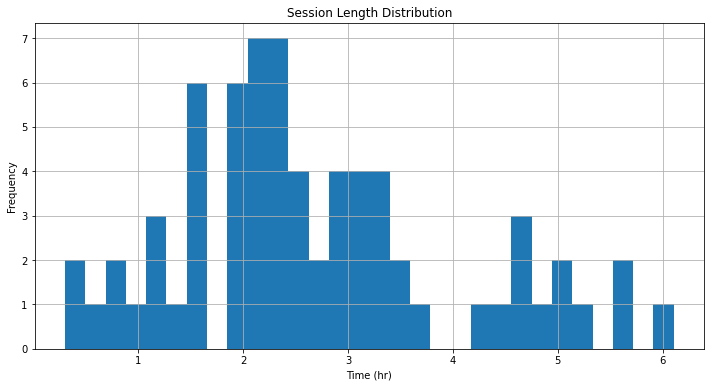

In [ ]:

#It displays how many profile_ids are used at a particular time in hours mentioned in x-axis. Around 2 hours is when most of the profile ids are being used.
sessions.plot.hist(bins=30, title='Session Length Distribution', figsize=(12,6), grid='both')
plt.xlabel('Time (hr)')

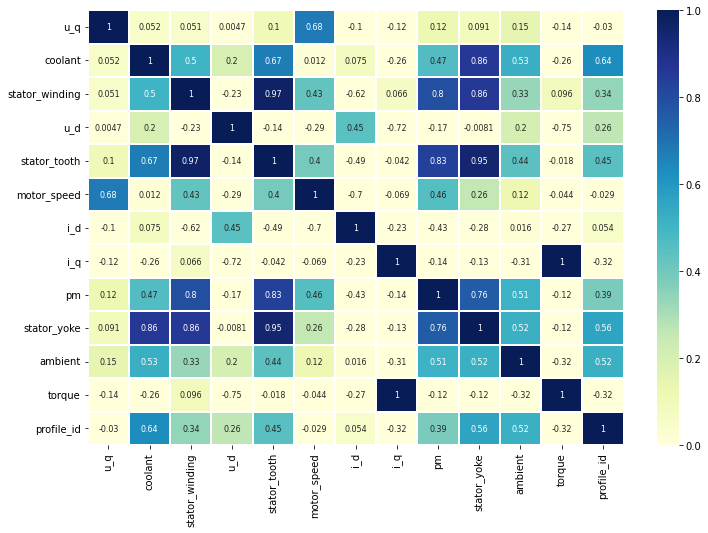

In [ ]:
figure(figsize=(12,8))
sns.heatmap(df.corr(),vmin=0, vmax=1, cmap="YlGnBu",linewidths=1, annot=True,annot_kws={"fontsize":8})
# Checking the correlaton of each column/attribute with the all others in the data frame and finding the best
# correlated columns with the target variable.

Points to note We see that the rotor temperature(pm) is corelated well with other features . Rotor temperature is also well corelated with stator temperarture so we can use predict rotor temperature first and then use that as an feature to predict stator temps

Also we see that there is a great corelation among various starter temperature so we can also decided if we want to predict one of the startor components only and assume the other around same temperature range . See the graph below

Also we see that stator tooth is most of the time in between stator yoke and stator winding

Also torque is in well agreement with i_q

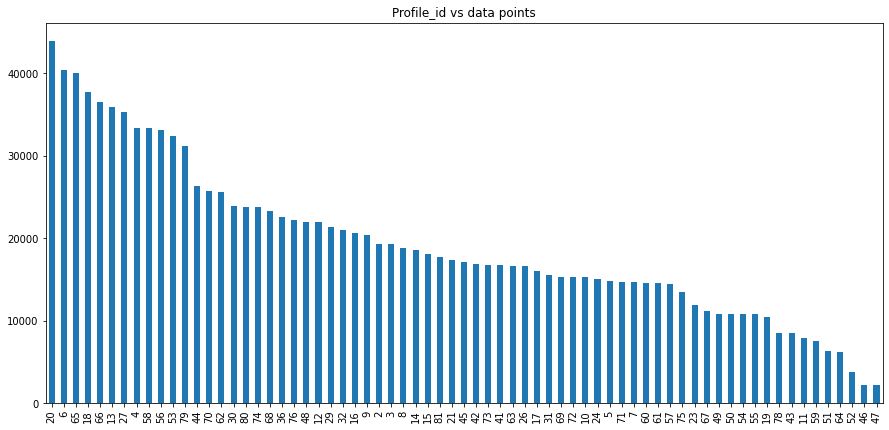

In [ ]:
plt.subplots(figsize=(15,7))
df['profile_id'].value_counts().plot(kind = 'bar')

plt.title('Profile_id vs data points');

We see that most frequent data for profile id is 20, 6 and 65

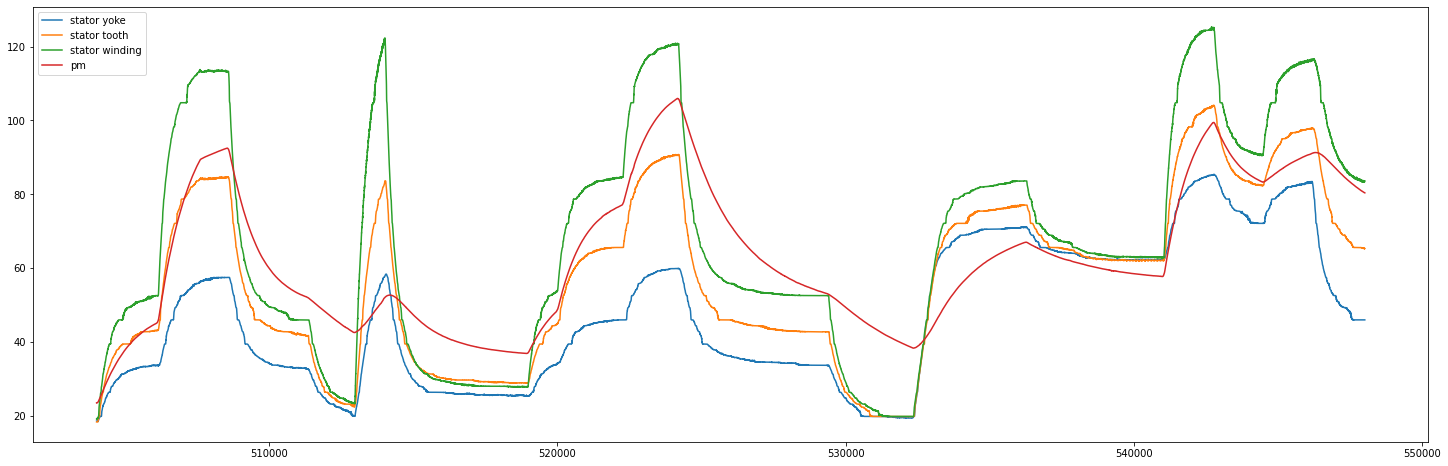

In [ ]:
plt.figure(figsize=(25,8))
df[df['profile_id'] == 20]['stator_yoke'].plot(label = 'stator yoke')
df[df['profile_id'] == 20]['stator_tooth'].plot(label = 'stator tooth')
df[df['profile_id'] == 20]['stator_winding'].plot(label = 'stator winding')
df[df['profile_id'] == 20]['pm'].plot(label = 'pm')
plt.legend()

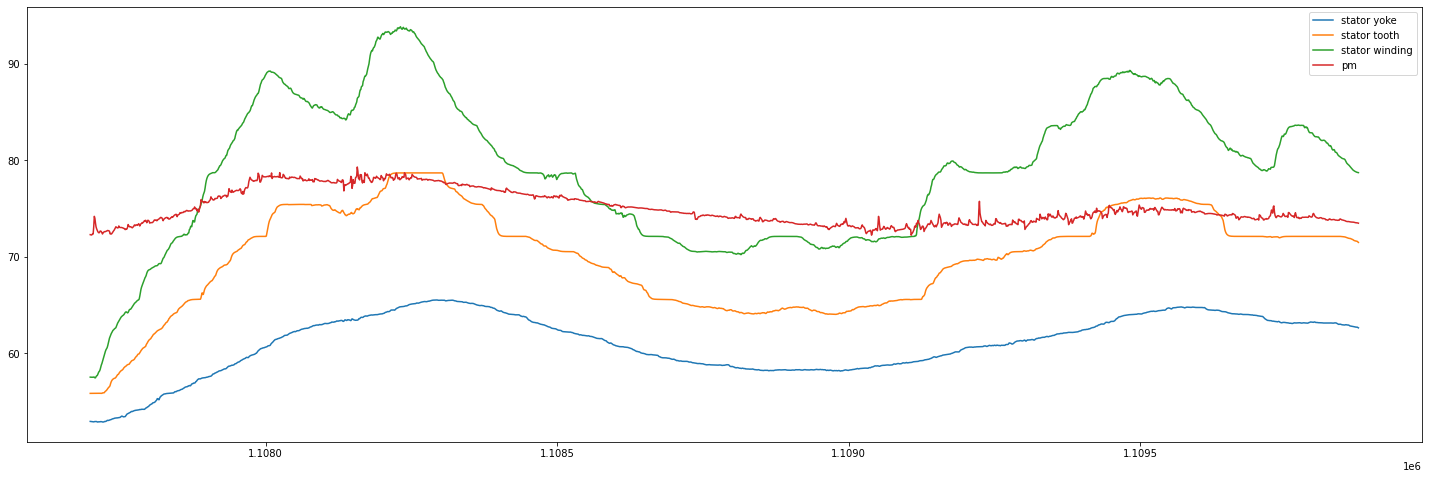

In [ ]:
plt.figure(figsize=(25,8))
df[df['profile_id'] == 47]['stator_yoke'].plot(label = 'stator yoke')
df[df['profile_id'] == 47]['stator_tooth'].plot(label = 'stator tooth')
df[df['profile_id'] == 47]['stator_winding'].plot(label = 'stator winding')
df[df['profile_id'] == 47]['pm'].plot(label = 'pm')
plt.legend()

Min and max values for profile id Visualize stator features and differ each-others. Stator yoke has more density than others.

So for minimum profile id has more differ aming stator features

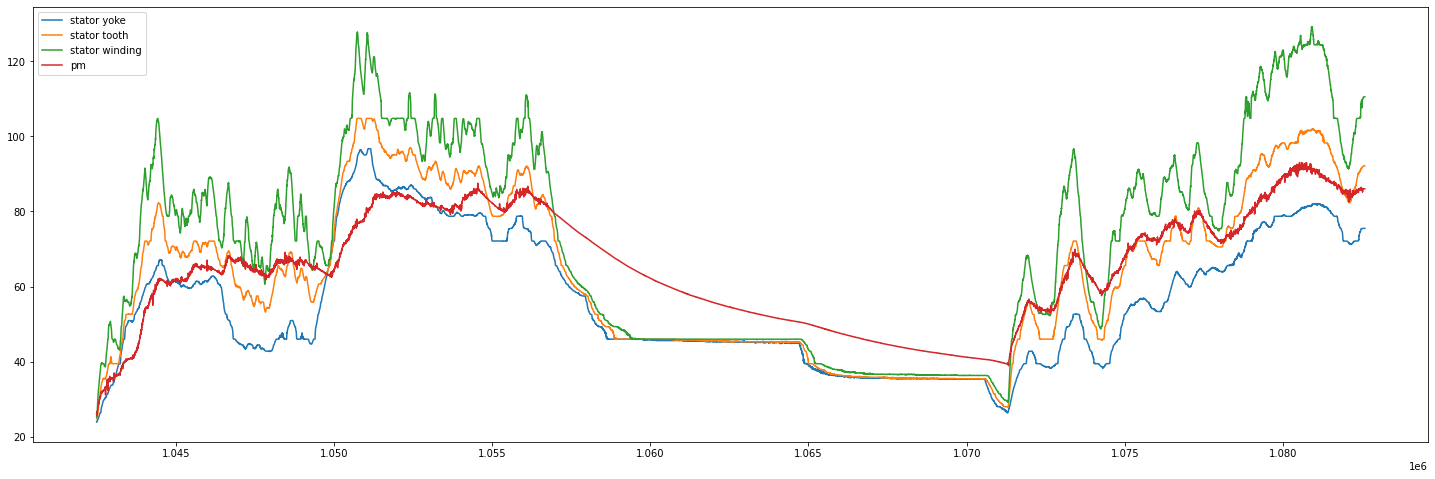

In [ ]:
plt.figure(figsize=(25,8))
df[df['profile_id'] == 65]['stator_yoke'].plot(label = 'stator yoke')
df[df['profile_id'] == 65]['stator_tooth'].plot(label = 'stator tooth')
df[df['profile_id'] == 65]['stator_winding'].plot(label = 'stator winding')
df[df['profile_id'] == 65]['pm'].plot(label = 'pm')
plt.legend()

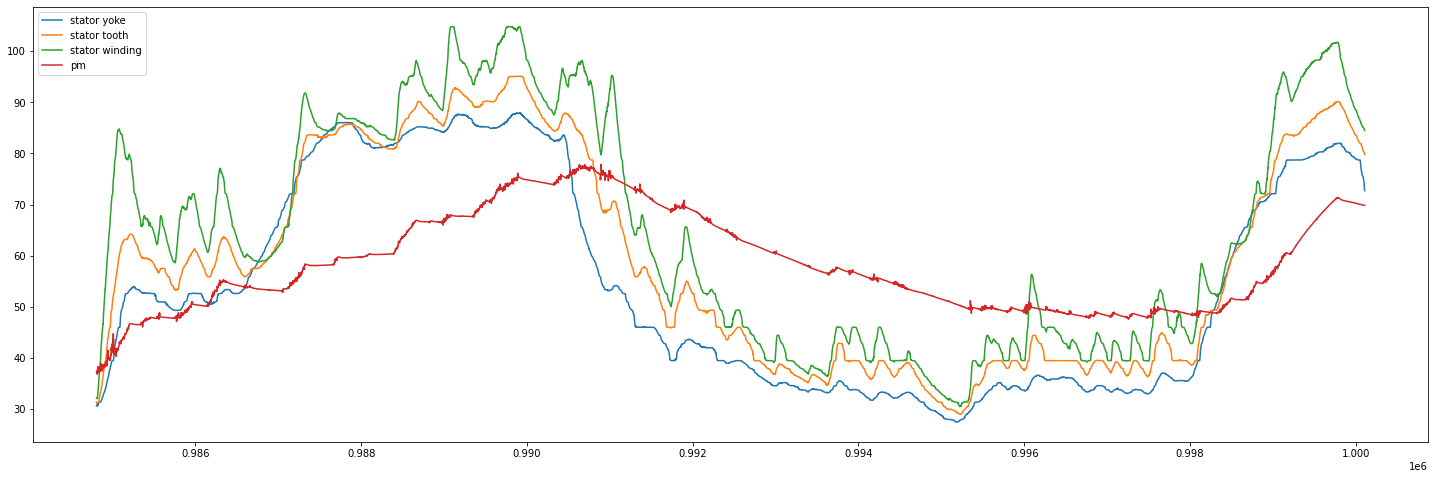

In [ ]:
plt.figure(figsize=(25,8))
df[df['profile_id'] == 72]['stator_yoke'].plot(label = 'stator yoke')
df[df['profile_id'] == 72]['stator_tooth'].plot(label = 'stator tooth')
df[df['profile_id'] == 72]['stator_winding'].plot(label = 'stator winding')
df[df['profile_id'] == 72]['pm'].plot(label = 'pm')
plt.legend()

In [ ]:
#Function to declare the visualization of parameters in the data frame
def parameter_visualizer(profileid_group, input_col, ylabel, n_cols):
    
    n_rows = (len(profileid_group) // n_cols)+1
    # creating n_rows variables to find the number of columns required to plot the viz.
    
    colours = plt.cm.Set1(np.linspace(0, 1, 10))
    # Assigns colours to each of the attributes required to plot the viz
    # Imported rgb2hex from matplotlib.colors repository
    clrs = {k: rgb2hex(colours[i]) for i, k in enumerate(input_col)}

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(3*n_cols, n_rows*2))
    
    # Setting axes names only for the grids occupied by the profiles and leaving as 'samples' for the unoccupied ones.
    for i, (ax, (p_id, df)) in enumerate(zip(axes.flatten(), profileid_group.items())):
        for col in input_col:
            lines = ax.plot(df[col].reset_index(drop=True), label=col, color=clrs[col])
        ax.set_title(f'profile {p_id}')
        if i % n_cols == 0:
            ax.set_ylabel(ylabel)
        else:
            ax.set_ylabel('')
        if i >= (len(profileid_group) - n_cols):
            ax.set_xlabel('Sample')
            
    # Adjusting the layout settings between the graphs for the good outlook.
    fig.tight_layout()
    _ = ax.legend(ncol=15, loc='lower center', bbox_to_anchor=(.5, 1), bbox_transform=fig.transFigure)

In [ ]:
# excluding the test set profiles by popping the profile_id no 65 and 72
profileid_group = {pid: df for pid, df in df.groupby('profile_id')}
input_col = ['coolant', 'pm','stator_yoke', 'stator_tooth', 'stator_winding', 'ambient']
profileid_train_group=profileid_group
profileid_train_group.pop(65)
profileid_train_group.pop(72)

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
984807,-1.887356,30.721162,32.113178,1.946434,31.291477,0.022686,-2.001102,1.098022,37.112483,30.660012,23.886441,1.867065e-04,72
984808,0.604919,30.721209,32.115623,0.109622,31.296847,27.444022,-8.944310,26.184500,37.111457,30.708855,23.885538,1.870292e+01,72
984809,4.665253,30.721242,32.122736,-6.753488,31.283346,116.920677,-35.659968,80.725465,37.116662,30.743853,23.883657,6.377540e+01,72
984810,9.206368,30.721266,32.130268,-16.699363,31.283340,251.384409,-59.658771,125.454513,36.924837,30.777050,23.880380,1.014234e+02,72
984811,14.197583,30.720804,32.117775,-28.559625,31.212032,418.588814,-77.320911,158.080952,36.922961,30.820728,23.874869,1.289248e+02,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000103,1.168448,49.646250,84.633893,1.443307,80.078491,-0.012083,-2.000468,1.095476,69.831335,73.326889,24.983185,-1.517244e-46,72
1000104,1.333185,49.365028,84.591523,1.392746,80.067769,0.001263,-1.997716,1.098727,69.826381,73.123211,24.995516,-1.087153e-46,72
1000105,1.218263,49.246061,84.536752,1.395507,79.994490,-0.003157,-2.000536,1.096283,69.828259,73.050584,25.001059,-7.789789e-47,72
1000106,1.344508,49.482157,84.505264,1.384974,79.941983,-0.001843,-2.000932,1.096748,69.822047,72.818152,24.992756,-5.581628e-47,72


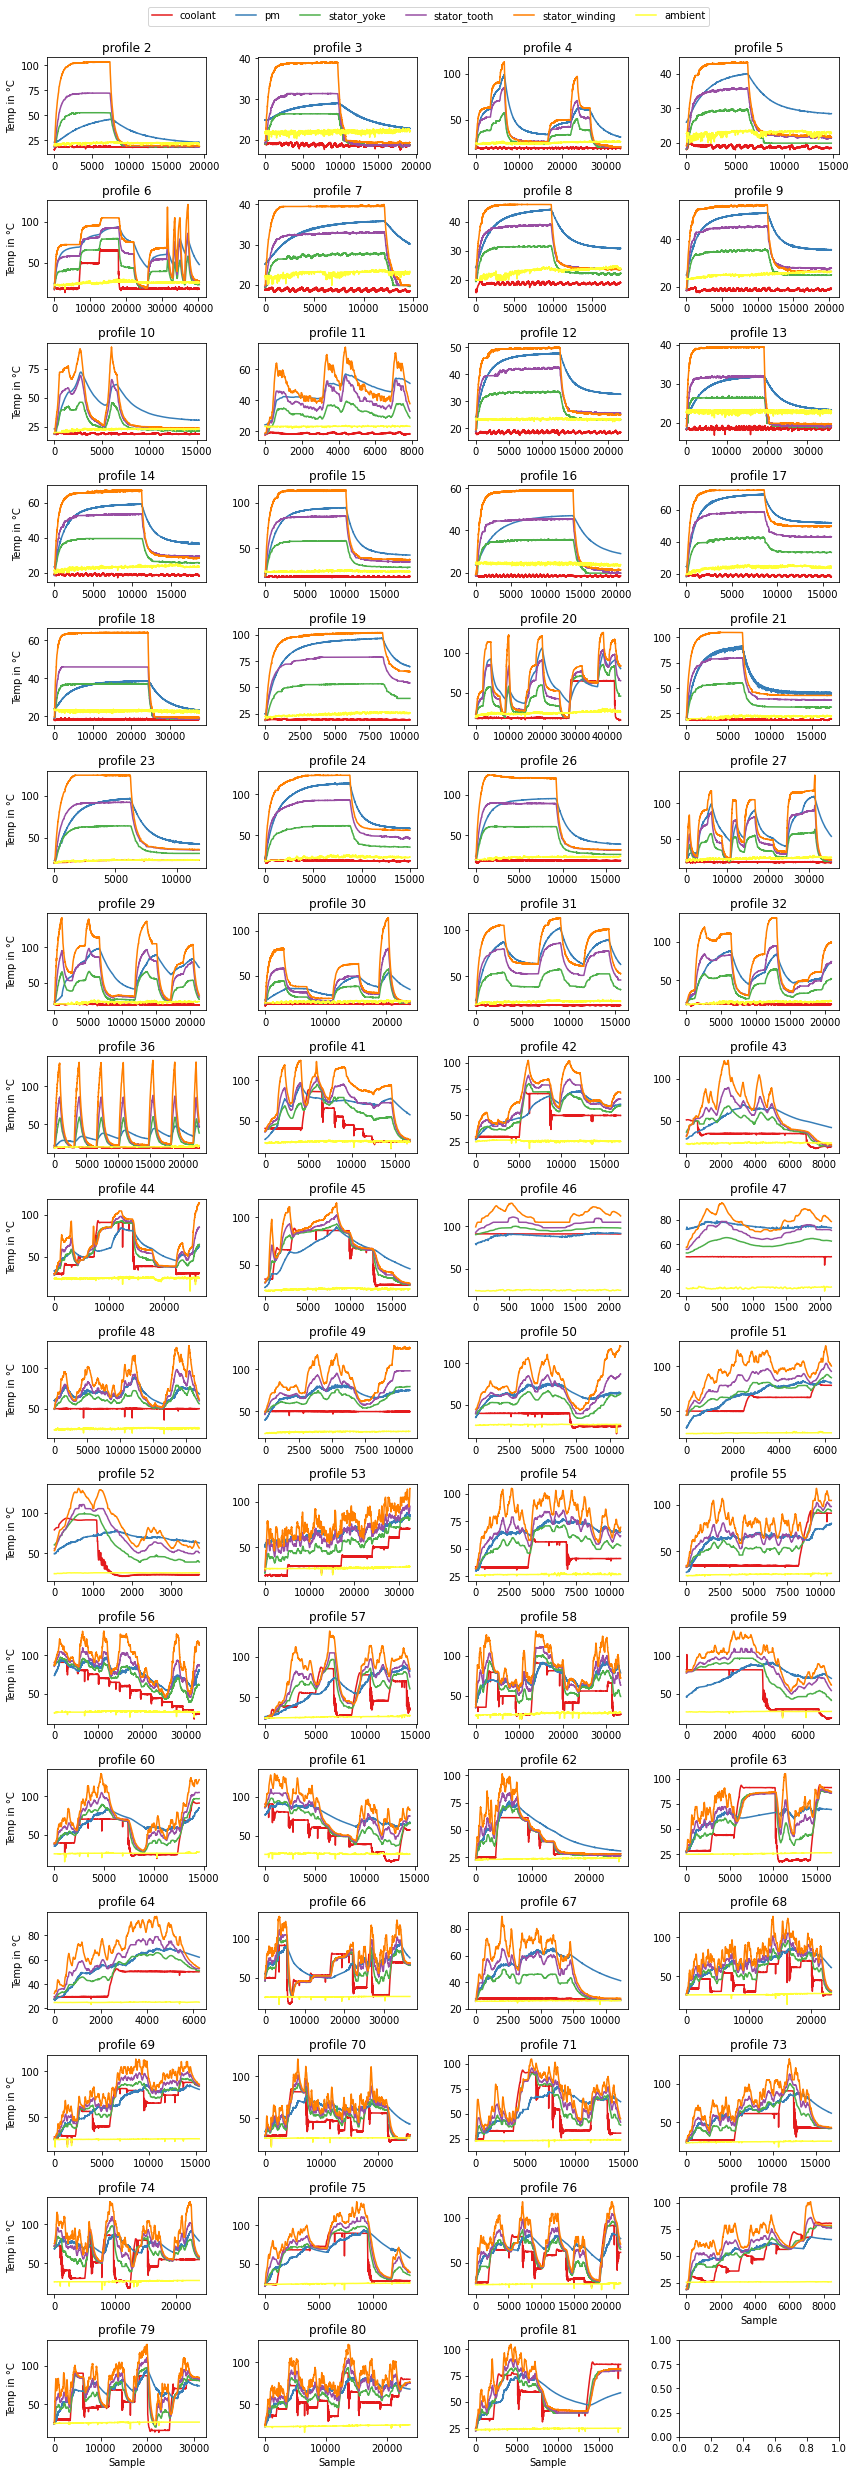

In [ ]:
#running the function parameter_visualizer with parameters
parameter_visualizer(profileid_train_group, input_col, ylabel='Temp in °C', n_cols=4)

#Train Test Split

In [5]:
X_test=df[(df['profile_id']==65) | (df['profile_id']==72)]
X_train=df[(df['profile_id']!=65) | (df['profile_id']!=72)]

In [6]:
print(X_test.shape)
print(X_train.shape)

(55395, 13)
(1330816, 13)


In [7]:
Y_train = X_train[['pm', 'stator_yoke', 'stator_tooth', 'stator_winding']]
print(Y_train.shape)
Y_test = X_test[['pm', 'stator_yoke', 'stator_tooth', 'stator_winding']]
print(Y_test.shape)

(1330816, 4)
(55395, 4)


In [8]:
X_train.drop(['pm', 'stator_yoke', 'stator_tooth', 'stator_winding'], axis=1, inplace=True)
print(X_train.shape)
X_test.drop(['pm', 'stator_yoke', 'stator_tooth', 'stator_winding'], axis=1, inplace=True)
print(X_test.shape)

(1330816, 9)
(55395, 9)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#Feature Scaling - StandardScaler

In [9]:
cols = X_train.columns
#Scaling the features
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

# fit and transform
X_trains = sc_X.fit_transform(X_train)
X_tests = sc_X.transform(X_test)

In [10]:
# Scaling dataframe
X_Train = pd.DataFrame(X_trains, columns=[cols])

X_Test = pd.DataFrame(X_tests, columns=[cols])

In [11]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((1330816, 9), (1330816, 4), (55395, 9), (55395, 4))

# 1 - Neural Network Model 1

## Step1: Build the model

In [127]:
model = Sequential()
# Input Layer
model.add(Dense(128, activation='ELU', input_shape=([len(X_train.keys())]), name="Input"))
# Hidden Layer
model.add(Dense(64, kernel_initializer='normal', activation='ELU', name="Dense1"))
model.add(Dropout(0.25))
model.add(Dense(32, kernel_initializer='normal', activation='ELU', name="Dense2"))
model.add(Dropout(0.25))
model.add(Dense(16, kernel_initializer='normal', activation='ELU', name="Dense3"))
model.add(Dropout(0.25))
model.add(Dense(8, kernel_initializer='normal', activation='ELU', name="Dense4"))
model.add(Dropout(0.25))

# Output Layer
model.add(Dense(4,kernel_initializer='normal', activation = 'linear', name="Output"))

adam1 =Nadam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=adam1, metrics=['accuracy', 'mse', 'mae'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 128)               1280      
                                                                 
 Dense1 (Dense)              (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 Dense2 (Dense)              (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 Dense3 (Dense)              (None, 16)                528       
                                                                 
 dropout_6 (Dropout)         (None, 16)               

## Step 2: Train the model

In [128]:
history = model.fit(X_train, Y_train, batch_size = 64 , epochs = 10, validation_data=(X_test, Y_test), verbose = 1)

Epoch 1/10
20794/20794 [==============================] - 89s 4ms/step - loss: 434.9290 - accuracy: 0.6502 - mse: 434.9290 - mae: 14.6751 - val_loss: 131.2253 - val_accuracy: 0.5825 - val_mse: 131.2253 - val_mae: 9.0365
Epoch 2/10
20794/20794 [==============================] - 89s 4ms/step - loss: 201.9491 - accuracy: 0.7409 - mse: 201.9491 - mae: 10.5055 - val_loss: 110.0474 - val_accuracy: 0.6628 - val_mse: 110.0474 - val_mae: 8.1379
Epoch 3/10
20794/20794 [==============================] - 89s 4ms/step - loss: 162.5748 - accuracy: 0.7591 - mse: 162.5748 - mae: 9.3730 - val_loss: 93.8953 - val_accuracy: 0.7273 - val_mse: 93.8953 - val_mae: 7.5063
Epoch 4/10
20794/20794 [==============================] - 90s 4ms/step - loss: 138.5714 - accuracy: 0.7619 - mse: 138.5714 - mae: 8.6637 - val_loss: 94.1859 - val_accuracy: 0.7243 - val_mse: 94.1859 - val_mae: 7.4548
Epoch 5/10
20794/20794 [==============================] - 90s 4ms/step - loss: 127.0900 - accuracy: 0.7642 - mse: 127.0900 - m

## Step 3: Plotting Diagrams

### Visualizing Accuracy and Loss

In [129]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'mse', 'mae', 'val_loss', 'val_accuracy', 'val_mse', 'val_mae'])


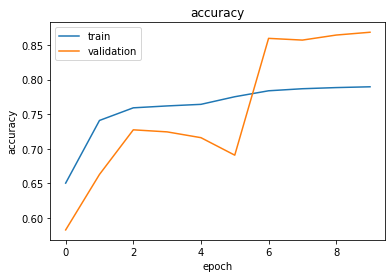

In [130]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

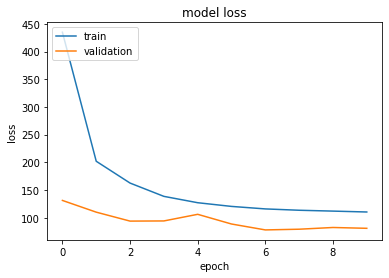

In [131]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Step 4: Evaluating the model

### Test Evaluation

In [132]:
cnn_model=model.evaluate(X_test, Y_test)
print(cnn_model)

1732/1732 [==============================] - 6s 3ms/step - loss: 80.8834 - accuracy: 0.8684 - mse: 80.8834 - mae: 6.9012
[80.8834228515625, 0.868435800075531, 80.8834228515625, 6.901215553283691]


### Model Prediction

In [133]:
t1 = time.time()
y_pred = model.predict(X_test)
# Testing has finished 
t2 = time.time()
print( 'Time taken was {} seconds'.format( t2 - t1))

Time taken was 2.6413936614990234 seconds


In [134]:
y_pred

array([[58.868885, 46.33363 , 52.69199 , 58.40013 ],
       [58.617836, 43.640156, 52.901295, 62.121716],
       [60.15226 , 44.654655, 53.46908 , 61.86443 ],
       ...,
       [60.45949 , 49.85622 , 57.899372, 66.27942 ],
       [52.920753, 41.601665, 49.927933, 58.939312],
       [60.803318, 50.77915 , 58.60748 , 66.79395 ]], dtype=float32)

In [135]:
Y_test

,pm,stator_yoke,stator_tooth,stator_winding
0,37.112483,30.660012,31.291477,32.113178
1,37.111457,30.708855,31.296847,32.115623
2,37.116662,30.743853,31.283346,32.122736
3,36.924837,30.777050,31.283340,32.130268
4,36.922961,30.820728,31.212032,32.117775
...,...,...,...,...
55390,86.033969,75.501177,92.167688,110.536934
55391,86.033969,75.501177,92.167688,110.536934
55392,86.033969,75.501177,92.167688,110.536934
55393,86.033969,75.501177,92.167688,110.536934


### Average MSE, MAE, R2 and KMSE Scores

In [136]:
model_RMSE=np.mean((y_pred - Y_test)**2, axis=0)
cnn_model_RMSE= np.sqrt(model_RMSE)
print(cnn_model_RMSE)

cnn_model_R2 = r2_score(Y_test, y_pred)
print(cnn_model_R2)

pm                 8.738296
stator_yoke        6.291615
stator_tooth       8.322200
stator_winding    11.761471
dtype: float64
0.7858212739432995


In [137]:
mae_nn = mean_absolute_error(Y_test, y_pred)
print(f"Mean absolute error is {mae_nn}")
mse_nn = mean_squared_error(Y_test, y_pred)
print(f"Mean squared error is {mse_nn}")

Mean absolute error is 6.901212353803325
Mean squared error is 80.88335930637425


## Step 5: Calculating Profile 65 and 72 MSE, MAE, R2 Scores for each Output

Restting the indexes

In [138]:
X_test.reset_index(drop = True,inplace = True)
Y_test.reset_index(drop = True,inplace = True)

storing the indexes of each profiles

In [139]:
indexes65 = X_test.index[X_test['profile_id']==65].tolist()
indexes72 = X_test.index[X_test['profile_id']==72].tolist()

In [140]:
y_test_65 = Y_test.iloc[indexes65]
y_test_72 = Y_test.iloc[indexes72]

In [141]:
X_test_65 = X_test.iloc[indexes65]
X_test_72 = X_test.iloc[indexes72]

### Model Prediction of Profiles (65 & 72)  

In [143]:
t1 = time.time()
Y_pred_65 = []
for i in indexes65:
  Y_pred_65.append(y_pred[i])

Y_pred_65 = np.array(Y_pred_65)
# Testing has finished 
t2 = time.time()
print( 'Time taken was {} seconds'.format( t2 - t1))

Time taken was 0.03474164009094238 seconds


In [144]:
t1 = time.time()
Y_pred_72 = []
for i in indexes72:
  Y_pred_72.append(y_pred[i])

Y_pred_72 = np.array(Y_pred_72)
# Testing has finished 
t2 = time.time()
print( 'Time taken was {} seconds'.format( t2 - t1))

Time taken was 0.011696815490722656 seconds


### Mean Average Perfomance (mAP) (MSE, MAE & R2)

In [210]:
MSE_NN_65 = mean_squared_error(y_test_65, Y_pred_65)
print("Profile 65 MSE: {0}".format(MSE_NN_65))
MSE_NN_72 = mean_squared_error(y_test_72, Y_pred_72)
print("Profile 72 MSE: {0}".format(MSE_NN_72))

MAE_NN_65 = mean_absolute_error(y_test_65, Y_pred_65)
print("Profile 65 MAE: {0}".format(MAE_NN_65))
MAE_NN_72 = mean_absolute_error(y_test_72, Y_pred_72)
print("Profile 72 MAE: {0}".format(MAE_NN_72))

r2_NN_65 = r2_score(y_test_65, Y_pred_65)
print(f"Profile 65 R^2 score of model is {r2_NN_65}")
r2_NN_72 = r2_score(y_test_72, Y_pred_72)
print(f"Profile 72 R^2 score of model is {r2_NN_72}")

Profile 65 MSE: 67.09830756100362
Profile 72 MSE: 117.0050418551562
Profile 65 MAE: 6.233748979588688
Profile 72 MAE: 8.650201081714117
Profile 65 R^2 score of model is 0.8350290686255729
Profile 72 R^2 score of model is 0.5012966088903941


### MAE for Profile 65 & 72

MAE for Profile 65

In [145]:
mae_65_1 = mean_absolute_error(y_test_65.iloc[:,0], Y_pred_65[:,0])
print(f"Proile 65: PM mae is {mae_65_1}")
mae_65_2 = mean_absolute_error(y_test_65.iloc[:,1], Y_pred_65[:,1])
print(f"Proile 65: Stator Yoke mae is {mae_65_2}")
mae_65_3 = mean_absolute_error(y_test_65.iloc[:,2], Y_pred_65[:,2])
print(f"Proile 65: Stator tooth mae is {mae_65_3}")
mae_65_4 = mean_absolute_error(y_test_65.iloc[:,3], Y_pred_65[:,3])
print(f"Proile 65: Stator Winding mae is {mae_65_4}")

Proile 65: PM mae is 6.16691481374222
Proile 65: Stator Yoke mae is 4.343584582368994
Proile 65: Stator tooth mae is 5.6888591318531425
Proile 65: Stator Winding mae is 8.735637390390561


MAE for Profile 72

In [146]:
mae_72_1 = mean_absolute_error(y_test_72.iloc[:,0], Y_pred_72[:,0])
print(f"Proile 72: PM mae is {mae_72_1}")
mae_72_2 = mean_absolute_error(y_test_72.iloc[:,1], Y_pred_72[:,1])
print(f"Proile 72: Stator Yoke mae is {mae_72_2}")
mae_72_3 = mean_absolute_error(y_test_72.iloc[:,2], Y_pred_72[:,2])
print(f"Proile 72: Stator tooth mae is {mae_72_3}")
mae_72_4 = mean_absolute_error(y_test_72.iloc[:,3], Y_pred_72[:,3])
print(f"Proile 72: Stator Winding mae is {mae_72_4}")

Proile 72: PM mae is 8.967342500399248
Proile 72: Stator Yoke mae is 6.376231002245372
Proile 72: Stator tooth mae is 8.141594643834896
Proile 72: Stator Winding mae is 11.115636180376788


### MSE for Profile 65 & 72

MSE for profile 65

In [147]:
NN_MSE = mean_squared_error(y_test_65.iloc[:,0], Y_pred_65[:,0])
print("Proile 65: PM MSE: {0}".format(NN_MSE))
NN_MSE1 = mean_squared_error(y_test_65.iloc[:,1], Y_pred_65[:,1])
print("Proile 65: Stator Yoke MSE: {0}".format(NN_MSE1))
NN_MSE2 = mean_squared_error(y_test_65.iloc[:,2], Y_pred_65[:,2])
print("Proile 65: Stator tooth MSE: {0}".format(NN_MSE2))
NN_MSE3 = mean_squared_error(y_test_65.iloc[:,3], Y_pred_65[:,3])
print("Proile 65: Stator Winding MSE: {0}".format(NN_MSE3))

Proile 65: PM MSE: 63.76345212365767
Proile 65: Stator Yoke MSE: 30.108254253180185
Proile 65: Stator tooth MSE: 55.18920377981842
Proile 65: Stator Winding MSE: 119.33232008735816


MSE for profile 72

In [148]:
NN_MSE = mean_squared_error(y_test_72.iloc[:,0], Y_pred_72[:,0])
print("Proile 72: PM MSE: {0}".format(NN_MSE))
NN_MSE1 = mean_squared_error(y_test_72.iloc[:,1], Y_pred_72[:,1])
print("Proile 72: Stator Yoke MSE: {0}".format(NN_MSE1))
NN_MSE2 = mean_squared_error(y_test_72.iloc[:,2], Y_pred_72[:,2])
print("Proile 72: Stator tooth MSE: {0}".format(NN_MSE2))
NN_MSE3 = mean_squared_error(y_test_72.iloc[:,3], Y_pred_72[:,3])
print("Proile 72: Stator Winding MSE: {0}".format(NN_MSE3))

Proile 72: PM MSE: 109.35947494368324
Proile 72: Stator Yoke MSE: 64.4152891310021
Proile 72: Stator tooth MSE: 106.1268437578017
Proile 72: Stator Winding MSE: 188.11855958813806


### R2 Scores for Profile 65 & 72

R2 score for profile 65

In [149]:
NN_R2 = r2_score(y_test_65.iloc[:,0], Y_pred_65[:,0])
print("Proile 65: PM R2: {0}".format(NN_R2))
NN_R2_1 = r2_score(y_test_65.iloc[:,1], Y_pred_65[:,1])
print("Proile 65: Stator Yoke R2: {0}".format(NN_R2_1))
NN_R2_2 = r2_score(y_test_65.iloc[:,2], Y_pred_65[:,2])
print("Proile 65: Stator Tooth R2: {0}".format(NN_R2_2))
NN_R2_3 = r2_score(y_test_65.iloc[:,3], Y_pred_65[:,3])
print("Proile 65: Stator Winding R2: {0}".format(NN_R2_3))

Proile 65: PM R2: 0.7246960302462924
Proile 65: Stator Yoke R2: 0.89941844085827
Proile 65: Stator Tooth R2: 0.8787641465050993
Proile 65: Stator Winding R2: 0.837237656892629


R2 scores for profile 72

In [150]:
NN_R2 = r2_score(y_test_72.iloc[:,0], Y_pred_72[:,0])
print("Proile 72: PM R2: {0}".format(NN_R2))
NN_R2_1 = r2_score(y_test_72.iloc[:,1], Y_pred_72[:,1])
print("Proile 72: Stator Yoke R2: {0}".format(NN_R2_1))
NN_R2_2 = r2_score(y_test_72.iloc[:,2], Y_pred_72[:,2])
print("Proile 72: Stator Tooth R2: {0}".format(NN_R2_2))
NN_R2_3 = r2_score(y_test_72.iloc[:,3], Y_pred_72[:,3])
print("Proile 72: Stator Winding R2: {0}".format(NN_R2_3))

Proile 72: PM R2: -0.21355587149736177
Proile 72: Stator Yoke R2: 0.8488955551586167
Proile 72: Stator Tooth R2: 0.7489813703886073
Proile 72: Stator Winding R2: 0.6208653815117137


## Step 6: Plotting Actual Vs Predicted Values for Profile 65 and 72 for each output

In [151]:
y_test_65.reset_index(drop = True,inplace = True)

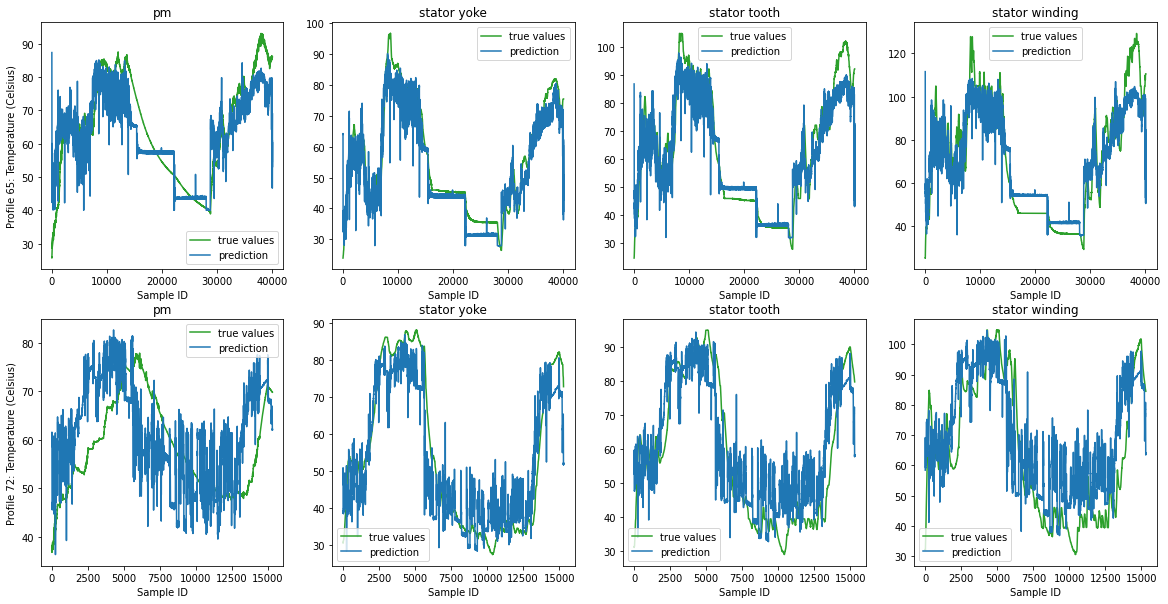

In [152]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
ax = axes[0, 0]
ax.plot(y_test_65.iloc[:,0], color='tab:green', label="true values")
ax.plot(Y_pred_65[:,0], color='tab:blue', label="prediction")
#ax.set_ylabel('Profile 65')
ax.set_ylabel('Profile 65: Temperature (Celsius)')
ax.set_xlabel('Sample ID')
ax.set_title("pm")
ax.legend()

ax = axes[0, 1]
ax.plot(y_test_65.iloc[:,1], color='tab:green', label="true values")
ax.plot(Y_pred_65[:,1], color='tab:blue', label="prediction")
#ax.set_ylabel('Temperature ')
ax.set_xlabel('Sample ID')
ax.set_title("stator yoke")
ax.legend()

ax = axes[0, 2]
ax.plot(y_test_65.iloc[:,2], color='tab:green', label="true values")
ax.plot(Y_pred_65[:,2], color='tab:blue', label="prediction")
#ax.set_ylabel('Temperature ')
ax.set_xlabel('Sample ID')
ax.set_title("stator tooth")
ax.legend()

ax = axes[0, 3]
ax.plot(y_test_65.iloc[:,3], color='tab:green', label="true values")
ax.plot(Y_pred_65[:,3], color='tab:blue', label="prediction")
#ax.set_ylabel('Temperature ')
ax.set_xlabel('Sample ID')
ax.set_title("stator winding")
ax.legend()

ax = axes[1, 0]
ax.plot(y_test_72.iloc[:,0], color='tab:green', label="true values")
ax.plot(Y_pred_72[:,0], color='tab:blue', label="prediction")
#ax.set_ylabel('Profile 72')
ax.set_xlabel('Sample ID')
ax.set_ylabel('Profile 72: Temperature (Celsius)')
ax.set_title("pm")
ax.legend()

ax = axes[1, 1]
ax.plot(y_test_72.iloc[:,1], color='tab:green', label="true values")
ax.plot(Y_pred_72[:,1], color='tab:blue', label="prediction")
#ax.set_ylabel('Temperature ')
ax.set_xlabel('Sample ID')
ax.set_title("stator yoke")
ax.legend()

ax = axes[1, 2]
ax.plot(y_test_72.iloc[:,2], color='tab:green', label="true values")
ax.plot(Y_pred_72[:,2], color='tab:blue', label="prediction")
#ax.set_ylabel('Temperature ')
ax.set_xlabel('Sample ID')
ax.set_title("stator tooth")
ax.legend()

ax = axes[1, 3]
ax.plot(y_test_72.iloc[:,3], color='tab:green', label="true values")
ax.plot(Y_pred_72[:,3], color='tab:blue', label="prediction")
#ax.set_ylabel('Temperature ')
ax.set_xlabel('Sample ID')
ax.set_title("stator winding")
ax.legend()
#ax.set_xlabel('Prediction vs Actual: x,y axes represent test set sample IDs and the temperature readings in Celsius', fontsize=20)

# 2 - Nueral Network Model 2

## Step1: Build the model

In [153]:
model_2 = Sequential()

# Input Layer
model_2.add(Dense(128, activation='relu', input_shape=([len(X_train.keys())]), name="Input"))

# Hidden Layer
model_2.add(Dense(64, kernel_initializer='normal', activation='relu', name="Dense1"))
model_2.add(Dropout(0.2))
model_2.add(Dense(32, kernel_initializer='normal', activation='relu', name="Dense2"))
model_2.add(Dropout(0.2))
model_2.add(Dense(16, kernel_initializer='normal', activation='relu', name="Dense3"))
model_2.add(Dropout(0.2))
model_2.add(Dense(8, kernel_initializer='normal', activation='relu', name="Dense4"))
model_2.add(Dropout(0.2))

# Output Layer
model_2.add(Dense(4,kernel_initializer='normal', activation = 'relu', name="Output"))

adam1 =Nadam(learning_rate=0.001)
model_2.compile(loss='mean_squared_error', optimizer=adam1, metrics=['accuracy'])
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 128)               1280      
                                                                 
 Dense1 (Dense)              (None, 64)                8256      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 Dense2 (Dense)              (None, 32)                2080      
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 Dense3 (Dense)              (None, 16)                528       
                                                                 
 dropout_10 (Dropout)        (None, 16)               

## Step 2: Train the model

In [154]:
history_2 = model_2.fit(X_train, Y_train, batch_size = 64 , epochs = 10, validation_data=(X_test, Y_test), verbose = 1)

Epoch 1/10
20794/20794 [==============================] - 84s 4ms/step - loss: 337.1421 - accuracy: 0.6582 - val_loss: 134.1198 - val_accuracy: 0.5825
Epoch 2/10
20794/20794 [==============================] - 82s 4ms/step - loss: 202.7525 - accuracy: 0.7497 - val_loss: 114.7109 - val_accuracy: 0.7308
Epoch 3/10
20794/20794 [==============================] - 83s 4ms/step - loss: 174.5103 - accuracy: 0.7575 - val_loss: 110.9433 - val_accuracy: 0.7283
Epoch 4/10
20794/20794 [==============================] - 83s 4ms/step - loss: 166.2762 - accuracy: 0.7578 - val_loss: 113.6608 - val_accuracy: 0.7305
Epoch 5/10
20794/20794 [==============================] - 83s 4ms/step - loss: 163.6690 - accuracy: 0.7582 - val_loss: 111.4115 - val_accuracy: 0.7253
Epoch 6/10
20794/20794 [==============================] - 83s 4ms/step - loss: 162.3014 - accuracy: 0.7585 - val_loss: 104.0881 - val_accuracy: 0.7039
Epoch 7/10
20794/20794 [==============================] - 82s 4ms/step - loss: 160.7900 - accu

## Step 3: Plotting Diagrams

### Visualizing Accuracy and Loss

In [155]:
print(history_2.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


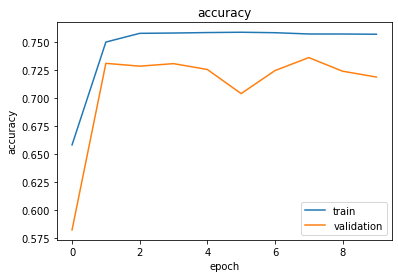

In [156]:
# summarize history for accuracy
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

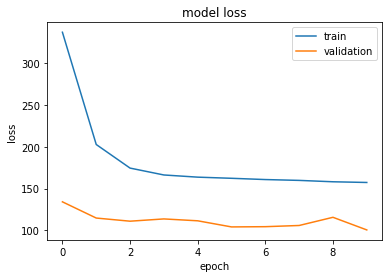

In [157]:
# summarize history for loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## Step 4: Evaluating the model

### Test Evaluation

In [158]:
cnn_model_2=model_2.evaluate(X_test, Y_test)
print(cnn_model_2)

1732/1732 [==============================] - 4s 2ms/step - loss: 100.5008 - accuracy: 0.7186
[100.50077819824219, 0.7186027765274048]


### Model Prediction

In [159]:
t1 = time.time()
y_pred_2 = model_2.predict(X_test)
# Testing has finished 
t2 = time.time()
print( 'Time taken was {} seconds'.format( t2 - t1))

Time taken was 2.117704153060913 seconds


### Average MSE, MAE, R2 and KMSE Scores

In [160]:
model_2_RMSE=np.mean((y_pred_2 - Y_test)**2, axis=0)
cnn_model_2_RMSE= np.sqrt(model_2_RMSE)
print(cnn_model_2_RMSE)

cnn_model_2_R2 = r2_score(Y_test, y_pred_2)
print(cnn_model_2_R2)

pm                10.215425
stator_yoke        8.753308
stator_tooth       8.762492
stator_winding    12.010246
dtype: float64
0.7169490567010153


In [161]:
mae_nn_2 = mean_absolute_error(Y_test, y_pred_2)
print(f"Mean absolute error is {mae_nn_2}")
mse_nn_2 = mean_squared_error(Y_test, y_pred_2)
print(f"Mean squared error is {mse_nn_2}")

Mean absolute error is 7.670882038259228
Mean squared error is 100.50064843406679


## Step 5: Calculating Profile 65 and 72 MSE, MAE, R2 Scores for each Output

Reset the indexes

In [162]:
X_test.reset_index(drop = True,inplace = True)
Y_test.reset_index(drop = True,inplace = True)

storing the indexes of each profiles

In [163]:
indexes65 = X_test.index[X_test['profile_id']==65].tolist()
indexes72 = X_test.index[X_test['profile_id']==72].tolist()

In [164]:
y_test_nn2_65 = Y_test.iloc[indexes65]
y_test_nn2_72 = Y_test.iloc[indexes72]

In [165]:
X_test_nn2_65 = X_test.iloc[indexes65]
X_test_nn2_72 = X_test.iloc[indexes72]

### Model Prediction of Profiles (65 & 72)  

In [166]:
t1 = time.time()
Y_pred_2_65 = []
for i in indexes65:
  Y_pred_2_65.append(y_pred_2[i])

Y_pred_2_65 = np.array(Y_pred_2_65)
# Testing has finished 
t2 = time.time()
print( 'Time taken was {} seconds'.format( t2 - t1))

Time taken was 0.02828049659729004 seconds


In [167]:
t1 = time.time()
Y_pred_2_72 = []
for i in indexes72:
  Y_pred_2_72.append(y_pred_2[i])

Y_pred_2_72 = np.array(Y_pred_2_72)
# Testing has finished 
t2 = time.time()
print( 'Time taken was {} seconds'.format( t2 - t1))

Time taken was 0.014150381088256836 seconds


### Mean Average Perfomance (mAP) (MSE, MAE & R2)

In [209]:
MSE_NN2_65 = mean_squared_error(y_test_nn2_65, Y_pred_2_65)
print("Profile 65 MSE: {0}".format(MSE_NN2_65))
MSE_NN2_72 = mean_squared_error(y_test_nn2_72, Y_pred_2_72)
print("Profile 72 MSE: {0}".format(MSE_NN2_72))

MAE_NN2_65 = mean_absolute_error(y_test_nn2_65, Y_pred_2_65)
print("Profile 65 MAE: {0}".format(MAE_NN2_65))
MAE_NN2_72 = mean_absolute_error(y_test_nn2_72, Y_pred_2_72)
print("Profile 72 MAE: {0}".format(MAE_NN2_72))

r2_NN2_65 = r2_score(y_test_nn2_65, Y_pred_2_65)
print(f"Profile 65 R^2 score of model is {r2_NN2_65}")
r2_NN2_72 = r2_score(y_test_nn2_72, Y_pred_2_72)
print(f"Profile 72 R^2 score of model is {r2_NN2_72}")

Profile 65 MSE: 79.35875130885793
Profile 72 MSE: 155.89985262582826
Profile 65 MAE: 6.799944496184914
Profile 72 MAE: 9.953044629719118
Profile 65 R^2 score of model is 0.7876935767067693
Profile 72 R^2 score of model is 0.29972871106328314


### MAE for Profiles 65 & 72

MAE for Profile 65 

In [168]:
mae_nn2_65_1 = mean_absolute_error(y_test_nn2_65.iloc[:,0], Y_pred_2_65[:,0])
print(f"Proile 65: PM mae is {mae_nn2_65_1}")
mae_nn2_65_2 = mean_absolute_error(y_test_nn2_65.iloc[:,1], Y_pred_2_65[:,1])
print(f"Proile 65: Stator Yoke mae is {mae_nn2_65_2}")
mae_nn2_65_3 = mean_absolute_error(y_test_nn2_65.iloc[:,2], Y_pred_2_65[:,2])
print(f"Proile 65: Stator tooth mae is {mae_nn2_65_3}")
mae_nn2_65_4 = mean_absolute_error(y_test_nn2_65.iloc[:,3], Y_pred_2_65[:,3])
print(f"Proile 65: Stator Winding mae is {mae_nn2_65_4}")

Proile 65: PM mae is 6.939027218892148
Proile 65: Stator Yoke mae is 6.760759333844714
Proile 65: Stator tooth mae is 5.448475060536743
Proile 65: Stator Winding mae is 8.05151637146625


MAE for Profile 72

In [169]:
mae_nn2_72_1 = mean_absolute_error(y_test_nn2_72.iloc[:,0], Y_pred_2_72[:,0])
print(f"Proile 72: PM mae is {mae_nn2_72_1}")
mae_nn2_72_2 = mean_absolute_error(y_test_nn2_72.iloc[:,1], Y_pred_2_72[:,1])
print(f"Proile 72: Stator Yoke mae is {mae_nn2_72_2}")
mae_nn2_72_3 = mean_absolute_error(y_test_nn2_72.iloc[:,2], Y_pred_2_72[:,2])
print(f"Proile 72: Stator tooth mae is {mae_nn2_72_3}")
mae_nn2_72_4 = mean_absolute_error(y_test_nn2_72.iloc[:,3], Y_pred_2_72[:,3])
print(f"Proile 72: Stator Winding mae is {mae_nn2_72_4}")

Proile 72: PM mae is 10.572239353385665
Proile 72: Stator Yoke mae is 8.478308213272074
Proile 72: Stator tooth mae is 8.825830330862447
Proile 72: Stator Winding mae is 11.93580062135624


### MSE for Profiles 65 & 72

MSE for Profile 65

In [170]:
NN2_MSE_65 = mean_squared_error(y_test_nn2_65.iloc[:,0], Y_pred_2_65[:,0])
print("Proile 65: PM MSE: {0}".format(NN2_MSE_65))
NN2_MSE1_65 = mean_squared_error(y_test_nn2_65.iloc[:,1], Y_pred_2_65[:,1])
print("Proile 65: Stator Yoke MSE: {0}".format(NN2_MSE1_65))
NN2_MSE2_65 = mean_squared_error(y_test_nn2_65.iloc[:,2], Y_pred_2_65[:,2])
print("Proile 65: Stator tooth MSE: {0}".format(NN2_MSE2_65))
NN2_MSE3_65 = mean_squared_error(y_test_nn2_65.iloc[:,3], Y_pred_2_65[:,3])
print("Proile 65: Stator Winding MSE: {0}".format(NN2_MSE3_65))

Proile 65: PM MSE: 82.70116348923618
Proile 65: Stator Yoke MSE: 62.36912439819566
Proile 65: Stator tooth MSE: 58.48639746082623
Proile 65: Stator Winding MSE: 113.87831988717404


MSE for Profile 72

In [171]:
NN2_MSE_72 = mean_squared_error(y_test_nn2_72.iloc[:,0], Y_pred_2_72[:,0])
print("Proile 72: PM MSE: {0}".format(NN2_MSE_72))
NN2_MSE1_72 = mean_squared_error(y_test_nn2_72.iloc[:,1], Y_pred_2_72[:,1])
print("Proile 72: Stator Yoke MSE: {0}".format(NN2_MSE1_72))
NN2_MSE2_72 = mean_squared_error(y_test_nn2_72.iloc[:,2], Y_pred_2_72[:,2])
print("Proile 72: Stator tooth MSE: {0}".format(NN2_MSE2_72))
NN2_MSE3_72 = mean_squared_error(y_test_nn2_72.iloc[:,3], Y_pred_2_72[:,3])
print("Proile 72: Stator Winding MSE: {0}".format(NN2_MSE3_72))

Proile 72: PM MSE: 161.0953650857129
Proile 72: Stator Yoke MSE: 113.96376399093484
Proile 72: Stator tooth MSE: 124.72028576062937
Proile 72: Stator Winding MSE: 223.81999566603707


### R2 Scores for Profile 65 & 72

R2 Scores for Profile 65

In [172]:
NN2_R2_65 = r2_score(y_test_nn2_65.iloc[:,0], Y_pred_2_65[:,0])
print("Proile 65: PM R2: {0}".format(NN2_R2_65))
NN2_R2_65_1 = r2_score(y_test_nn2_65.iloc[:,1], Y_pred_2_65[:,1])
print("Proile 65: Stator Yoke R2: {0}".format(NN2_R2_65_1))
NN2_R2_65_2 = r2_score(y_test_nn2_65.iloc[:,2], Y_pred_2_65[:,2])
print("Proile 65: Stator Tooth R2: {0}".format(NN2_R2_65_2))
NN2_R2_65_3 = r2_score(y_test_nn2_65.iloc[:,3], Y_pred_2_65[:,3])
print("Proile 65: Stator Winding R2: {0}".format(NN2_R2_65_3))

Proile 65: PM R2: 0.6429308976608924
Proile 65: Stator Yoke R2: 0.7916457154398971
Proile 65: Stator Tooth R2: 0.8715210978166318
Proile 65: Stator Winding R2: 0.8446765959096545


R2 Scores for Profile 72

In [173]:
NN2_R2_72 = r2_score(y_test_nn2_72.iloc[:,0], Y_pred_2_72[:,0])
print("Proile 72: PM R2: {0}".format(NN2_R2_72))
NN2_R2_72_1 = r2_score(y_test_nn2_72.iloc[:,1], Y_pred_2_72[:,1])
print("Proile 72: Stator Yoke R2: {0}".format(NN2_R2_72_1))
NN2_R2_72_2 = r2_score(y_test_nn2_72.iloc[:,2], Y_pred_2_72[:,2])
print("Proile 72: Stator Tooth R2: {0}".format(NN2_R2_72_2))
NN2_R2_72_3 = r2_score(y_test_nn2_72.iloc[:,3], Y_pred_2_72[:,3])
print("Proile 72: Stator Winding R2: {0}".format(NN2_R2_72_3))

Proile 72: PM R2: -0.7876661009158425
Proile 72: Stator Yoke R2: 0.732665466192921
Proile 72: Stator Tooth R2: 0.7050028615962397
Proile 72: Stator Winding R2: 0.5489126173798131


## Step 6: Plotting Actual Vs Predicted Values for Profile 65 and 72 for each output

In [174]:
y_test_nn2_65.reset_index(drop = True,inplace = True)

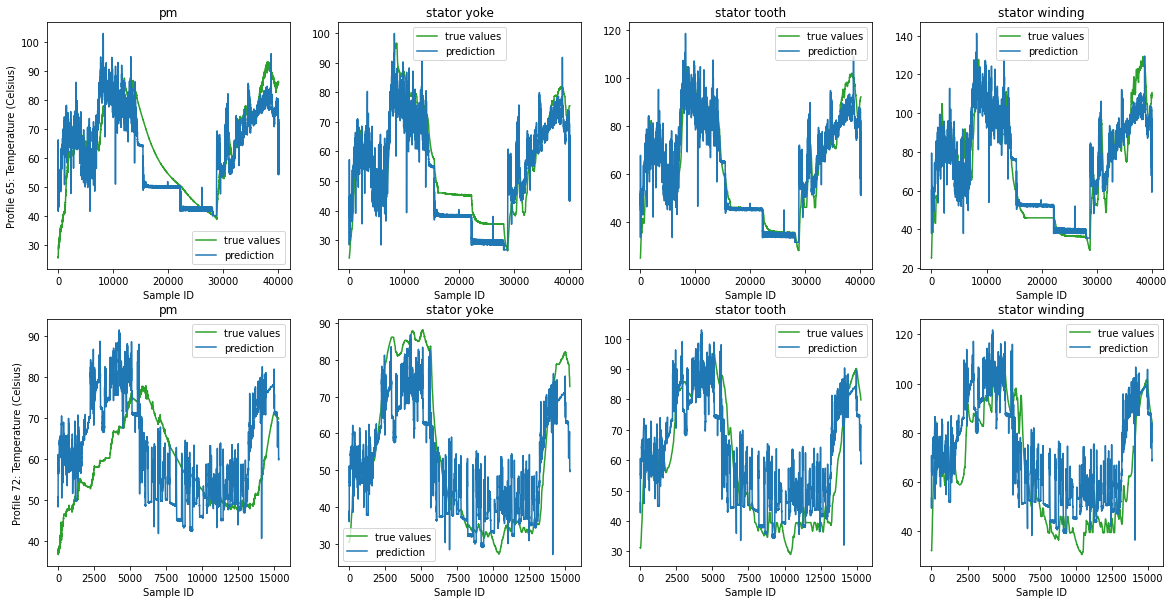

In [175]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
ax = axes[0, 0]
ax.plot(y_test_nn2_65.iloc[:,0], color='tab:green', label="true values")
ax.plot(Y_pred_2_65[:,0], color='tab:blue', label="prediction")
#ax.set_ylabel('Profile 65')
ax.set_ylabel('Profile 65: Temperature (Celsius)')
ax.set_xlabel('Sample ID')
ax.set_title("pm")
ax.legend()

ax = axes[0, 1]
ax.plot(y_test_nn2_65.iloc[:,1], color='tab:green', label="true values")
ax.plot(Y_pred_2_65[:,1], color='tab:blue', label="prediction")
#ax.set_ylabel('Temperature ')
ax.set_xlabel('Sample ID')
ax.set_title("stator yoke")
ax.legend()

ax = axes[0, 2]
ax.plot(y_test_nn2_65.iloc[:,2], color='tab:green', label="true values")
ax.plot(Y_pred_2_65[:,2], color='tab:blue', label="prediction")
#ax.set_ylabel('Temperature ')
ax.set_xlabel('Sample ID')
ax.set_title("stator tooth")
ax.legend()

ax = axes[0, 3]
ax.plot(y_test_nn2_65.iloc[:,3], color='tab:green', label="true values")
ax.plot(Y_pred_2_65[:,3], color='tab:blue', label="prediction")
#ax.set_ylabel('Temperature ')
ax.set_xlabel('Sample ID')
ax.set_title("stator winding")
ax.legend()

ax = axes[1, 0]
ax.plot(y_test_nn2_72.iloc[:,0], color='tab:green', label="true values")
ax.plot(Y_pred_2_72[:,0], color='tab:blue', label="prediction")
#ax.set_ylabel('Profile 72')
ax.set_xlabel('Sample ID')
ax.set_ylabel('Profile 72: Temperature (Celsius)')
ax.set_title("pm")
ax.legend()

ax = axes[1, 1]
ax.plot(y_test_nn2_72.iloc[:,1], color='tab:green', label="true values")
ax.plot(Y_pred_2_72[:,1], color='tab:blue', label="prediction")
#ax.set_ylabel('Temperature ')
ax.set_xlabel('Sample ID')
ax.set_title("stator yoke")
ax.legend()

ax = axes[1, 2]
ax.plot(y_test_nn2_72.iloc[:,2], color='tab:green', label="true values")
ax.plot(Y_pred_2_72[:,2], color='tab:blue', label="prediction")
#ax.set_ylabel('Temperature ')
ax.set_xlabel('Sample ID')
ax.set_title("stator tooth")
ax.legend()

ax = axes[1, 3]
ax.plot(y_test_nn2_72.iloc[:,3], color='tab:green', label="true values")
ax.plot(Y_pred_2_72[:,3], color='tab:blue', label="prediction")
#ax.set_ylabel('Temperature ')
ax.set_xlabel('Sample ID')
ax.set_title("stator winding")
ax.legend()
#ax.set_xlabel('Prediction vs Actual: x,y axes represent test set sample IDs and the temperature readings in Celsius', fontsize=20)

# 3 - Neural Network Model 3

## Step1: Build the model

In [176]:
model_3 = Sequential()

# Input Layer
model_3.add(Dense(128, activation='ELU', input_shape=([len(X_train.keys())]), name="Input"))
# Hidden Layer
model_3.add(Dense(64, kernel_initializer='normal', activation='ELU', name="Dense1"))
model_3.add(Dropout(0.2))
model_3.add(Dense(32, kernel_initializer='normal', activation='ELU', name="Dense2"))
model_3.add(Dropout(0.2))
model_3.add(Dense(16, kernel_initializer='normal', activation='ELU', name="Dense3"))
model_3.add(Dropout(0.2))
model_3.add(Dense(8, kernel_initializer='normal', activation='ELU', name="Dense4"))
model_3.add(Dropout(0.2))

# Output Layer
model_3.add(Dense(4,kernel_initializer='normal', activation = 'ELU', name="Output"))

adam1 =Nadam(learning_rate=0.001)
model_3.compile(loss='mean_squared_error', optimizer=adam1, metrics=['accuracy'])
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 128)               1280      
                                                                 
 Dense1 (Dense)              (None, 64)                8256      
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 Dense2 (Dense)              (None, 32)                2080      
                                                                 
 dropout_13 (Dropout)        (None, 32)                0         
                                                                 
 Dense3 (Dense)              (None, 16)                528       
                                                                 
 dropout_14 (Dropout)        (None, 16)               

## Step 2: Train the model

In [177]:
history_3 = model_3.fit(X_train, Y_train, batch_size = 64 , epochs = 20, validation_data=(X_test, Y_test), verbose = 1)

Epoch 1/20
20794/20794 [==============================] - 84s 4ms/step - loss: 304.7153 - accuracy: 0.6985 - val_loss: 126.3491 - val_accuracy: 0.7222
Epoch 2/20
20794/20794 [==============================] - 84s 4ms/step - loss: 191.1227 - accuracy: 0.7682 - val_loss: 114.8995 - val_accuracy: 0.8589
Epoch 3/20
20794/20794 [==============================] - 83s 4ms/step - loss: 152.7596 - accuracy: 0.7901 - val_loss: 93.8889 - val_accuracy: 0.8796
Epoch 4/20
20794/20794 [==============================] - 84s 4ms/step - loss: 130.0247 - accuracy: 0.7929 - val_loss: 79.4922 - val_accuracy: 0.8822
Epoch 5/20
20794/20794 [==============================] - 83s 4ms/step - loss: 119.5407 - accuracy: 0.7883 - val_loss: 79.2178 - val_accuracy: 0.8839
Epoch 6/20
20794/20794 [==============================] - 83s 4ms/step - loss: 114.2325 - accuracy: 0.7924 - val_loss: 79.5669 - val_accuracy: 0.8820
Epoch 7/20
20794/20794 [==============================] - 83s 4ms/step - loss: 111.4351 - accuracy

## Step 3: Plotting Diagrams

### Visualizing Accuracy and Loss

In [178]:
print(history_3.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


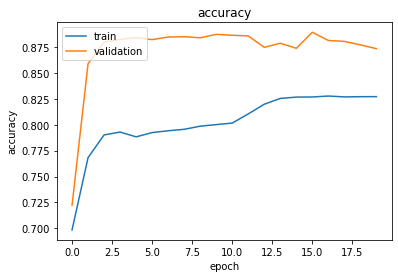

In [179]:
# summarize history for accuracy
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

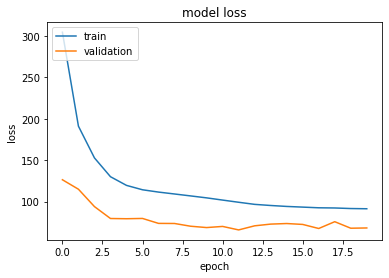

In [180]:
# summarize history for loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Step 4: Evaluating the model

### Test Evaluation

In [181]:
cnn_model_3=model_3.evaluate(X_test, Y_test)
print(cnn_model_3)

1732/1732 [==============================] - 4s 2ms/step - loss: 68.0586 - accuracy: 0.8733
[68.05858612060547, 0.873327910900116]


### Model Prediction

In [182]:
t1 = time.time()
y_pred_3 = model_3.predict(X_test)
# Testing has finished 
t2 = time.time()
print( 'Time taken was {} seconds'.format( t2 - t1))

Time taken was 2.6374635696411133 seconds


In [183]:
y_pred_3

array([[55.774353, 45.975784, 51.86205 , 57.652573],
       [54.981224, 41.616943, 51.60911 , 62.456997],
       [62.499683, 48.203556, 59.51516 , 71.55231 ],
       ...,
       [61.992565, 71.1501  , 76.13946 , 84.262375],
       [64.59347 , 73.402695, 78.52046 , 86.645905],
       [61.08718 , 70.30557 , 75.305405, 83.48194 ]], dtype=float32)

In [184]:
Y_test

,pm,stator_yoke,stator_tooth,stator_winding
0,37.112483,30.660012,31.291477,32.113178
1,37.111457,30.708855,31.296847,32.115623
2,37.116662,30.743853,31.283346,32.122736
3,36.924837,30.777050,31.283340,32.130268
4,36.922961,30.820728,31.212032,32.117775
...,...,...,...,...
55390,86.033969,75.501177,92.167688,110.536934
55391,86.033969,75.501177,92.167688,110.536934
55392,86.033969,75.501177,92.167688,110.536934
55393,86.033969,75.501177,92.167688,110.536934


### Average MSE, MAE, R2 and KMSE Scores

In [185]:
model_3_RMSE=np.mean((y_pred_3 - Y_test)**2, axis=0)
cnn_model_3_RMSE= np.sqrt(model_3_RMSE)
print(cnn_model_3_RMSE)

cnn_model_3_R2 = r2_score(Y_test, y_pred_3)
print(cnn_model_3_R2)

pm                 7.784444
stator_yoke        6.394066
stator_tooth       7.786198
stator_winding    10.494171
dtype: float64
0.8196800164140324


In [186]:
mae_nn_3 = mean_absolute_error(Y_test, y_pred_3)
print(f"Mean absolute error is {mae_nn_3}")
mse_nn_3 = mean_squared_error(Y_test, y_pred_3)
print(f"Mean squared error is {mse_nn_3}")

Mean absolute error is 6.305617118512713
Mean squared error is 68.05853756828037


## Step 5: Calculating Profile 65 and 72 MSE, MAE, R2 Scores for each Output

Reset the indexes

In [187]:
X_test.reset_index(drop = True,inplace = True)
Y_test.reset_index(drop = True,inplace = True)

storing the indexes of each profiles

In [188]:
indexes65 = X_test.index[X_test['profile_id']==65].tolist()
indexes72 = X_test.index[X_test['profile_id']==72].tolist()

In [189]:
y_test_nn3_65 = Y_test.iloc[indexes65]
y_test_nn3_72 = Y_test.iloc[indexes72]

In [190]:
X_test_nn3_65 = X_test.iloc[indexes65]
X_test_nn3_72 = X_test.iloc[indexes72]

### Model Prediction of Profiles (65 & 72)

In [191]:
t1 = time.time()
Y_pred_3_65 = []
for i in indexes65:
  Y_pred_3_65.append(y_pred_3[i])

Y_pred_3_65 = np.array(Y_pred_3_65)
# Testing has finished 
t2 = time.time()
print( 'Time taken was {} seconds'.format( t2 - t1))

Time taken was 0.028615951538085938 seconds


In [192]:
t1 = time.time()
Y_pred_3_72 = []
for i in indexes72:
  Y_pred_3_72.append(y_pred_3[i])

Y_pred_3_72 = np.array(Y_pred_3_72)
# Testing has finished 
t2 = time.time()
print( 'Time taken was {} seconds'.format( t2 - t1))

Time taken was 0.01634979248046875 seconds


### Mean Average Perfomance (mAP) (MSE, MAE & R2)

In [203]:
MSE_65 = mean_squared_error(y_test_nn3_65, Y_pred_3_65)
print("Profile 65 MSE: {0}".format(MSE_65))
MSE_72 = mean_squared_error(y_test_nn3_72, Y_pred_3_72)
print("Profile 72 MSE: {0}".format(MSE_72))

MAE_65 = mean_absolute_error(y_test_nn3_65, Y_pred_3_65)
print("Profile 65 MAE: {0}".format(MAE_65))
MAE_72 = mean_absolute_error(y_test_nn3_72, Y_pred_3_72)
print("Profile 72 MAE: {0}".format(MAE_72))

r2_65 = r2_score(y_test_nn3_65, Y_pred_3_65)
print(f"Profile 65 R^2 score of model is {r2_65}")
r2_72 = r2_score(y_test_nn3_72, Y_pred_3_72)
print(f"Profile 72 R^2 score of model is {r2_72}")

Profile 65 MSE: 54.12020255388119
Profile 72 MSE: 104.58187617799997
Profile 65 MAE: 5.664929929566513
Profile 72 MAE: 7.984442826218695
Profile 65 R^2 score of model is 0.8616083197356716
Profile 72 R^2 score of model is 0.5909389003682767


### MAE for Profiles 65 & 72

MAE for Profile 65

In [193]:
mae_nn3_65_1 = mean_absolute_error(y_test_nn3_65.iloc[:,0], Y_pred_3_65[:,0])
print(f"Proile 65: PM mae is {mae_nn3_65_1}")
mae_nn3_65_2 = mean_absolute_error(y_test_nn3_65.iloc[:,1], Y_pred_3_65[:,1])
print(f"Proile 65: Stator Yoke mae is {mae_nn3_65_2}")
mae_nn3_65_3 = mean_absolute_error(y_test_nn3_65.iloc[:,2], Y_pred_3_65[:,2])
print(f"Proile 65: Stator tooth mae is {mae_nn3_65_3}")
mae_nn3_65_4 = mean_absolute_error(y_test_nn3_65.iloc[:,3], Y_pred_3_65[:,3])
print(f"Proile 65: Stator Winding mae is {mae_nn3_65_4}")

Proile 65: PM mae is 5.7683037835311515
Proile 65: Stator Yoke mae is 4.710897304425171
Proile 65: Stator tooth mae is 4.955551198908144
Proile 65: Stator Winding mae is 7.224967431401761


MAE for Profile 72

In [194]:
mae_nn3_72_1 = mean_absolute_error(y_test_nn3_72.iloc[:,0], Y_pred_3_72[:,0])
print(f"Proile 72: PM mae is {mae_nn3_72_1}")
mae_nn3_72_2 = mean_absolute_error(y_test_nn3_72.iloc[:,1], Y_pred_3_72[:,1])
print(f"Proile 72: Stator Yoke mae is {mae_nn3_72_2}")
mae_nn3_72_3 = mean_absolute_error(y_test_nn3_72.iloc[:,2], Y_pred_3_72[:,2])
print(f"Proile 72: Stator tooth mae is {mae_nn3_72_3}")
mae_nn3_72_4 = mean_absolute_error(y_test_nn3_72.iloc[:,3], Y_pred_3_72[:,3])
print(f"Proile 72: Stator Winding mae is {mae_nn3_72_4}")

Proile 72: PM mae is 7.358269272753839
Proile 72: Stator Yoke mae is 6.295117436949621
Proile 72: Stator tooth mae is 7.971962904732447
Proile 72: Stator Winding mae is 10.31242169043874


### MSE for Profiles 65 & 72

MSE for Profile 65

In [195]:
NN3_MSE_65 = mean_squared_error(y_test_nn3_65.iloc[:,0], Y_pred_3_65[:,0])
print("Proile 65: PM MSE: {0}".format(NN3_MSE_65))
NN3_MSE1_65 = mean_squared_error(y_test_nn3_65.iloc[:,1], Y_pred_3_65[:,1])
print("Proile 65: Stator Yoke MSE: {0}".format(NN3_MSE1_65))
NN3_MSE2_65 = mean_squared_error(y_test_nn3_65.iloc[:,2], Y_pred_3_65[:,2])
print("Proile 65: Stator tooth MSE: {0}".format(NN3_MSE2_65))
NN3_MSE3_65 = mean_squared_error(y_test_nn3_65.iloc[:,3], Y_pred_3_65[:,3])
print("Proile 65: Stator Winding MSE: {0}".format(NN3_MSE3_65))

Proile 65: PM MSE: 52.75094936354584
Proile 65: Stator Yoke MSE: 32.997756091064545
Proile 65: Stator tooth MSE: 44.746890965205885
Proile 65: Stator Winding MSE: 85.98521379570765


MSE for Profile 72

In [196]:
NN3_MSE_72 = mean_squared_error(y_test_nn3_72.iloc[:,0], Y_pred_3_72[:,0])
print("Proile 72: PM MSE: {0}".format(NN3_MSE_72))
NN3_MSE1_72 = mean_squared_error(y_test_nn3_72.iloc[:,1], Y_pred_3_72[:,1])
print("Proile 72: Stator Yoke MSE: {0}".format(NN3_MSE1_72))
NN3_MSE2_72 = mean_squared_error(y_test_nn3_72.iloc[:,2], Y_pred_3_72[:,2])
print("Proile 72: Stator tooth MSE: {0}".format(NN3_MSE2_72))
NN3_MSE3_72 = mean_squared_error(y_test_nn3_72.iloc[:,3], Y_pred_3_72[:,3])
print("Proile 72: Stator Winding MSE: {0}".format(NN3_MSE3_72))

Proile 72: PM MSE: 81.15849180987482
Proile 72: Stator Yoke MSE: 61.54900459711566
Proile 72: Stator tooth MSE: 102.23078443755668
Proile 72: Stator Winding MSE: 173.38922386745202


### R2 Scores for Profile 65 & 72

R2 Scores for Profile 65 

In [197]:
NN3_R2_65 = r2_score(y_test_nn3_65.iloc[:,0], Y_pred_3_65[:,0])
print("Proile 65: PM R2: {0}".format(NN3_R2_65))
NN3_R2_65_1 = r2_score(y_test_nn3_65.iloc[:,1], Y_pred_3_65[:,1])
print("Proile 65: Stator Yoke R2: {0}".format(NN3_R2_65_1))
NN3_R2_65_2 = r2_score(y_test_nn3_65.iloc[:,2], Y_pred_3_65[:,2])
print("Proile 65: Stator Tooth R2: {0}".format(NN3_R2_65_2))
NN3_R2_65_3 = r2_score(y_test_nn3_65.iloc[:,3], Y_pred_3_65[:,3])
print("Proile 65: Stator Winding R2: {0}".format(NN3_R2_65_3))

Proile 65: PM R2: 0.7722434202606041
Proile 65: Stator Yoke R2: 0.8897655862771511
Proile 65: Stator Tooth R2: 0.9017031023123079
Proile 65: Stator Winding R2: 0.8827211700926256


R2 Scores for Profile 72

In [198]:
NN3_R2_72 = r2_score(y_test_nn3_72.iloc[:,0], Y_pred_3_72[:,0])
print("Proile 72: PM R2: {0}".format(NN3_R2_72))
NN3_R2_72_1 = r2_score(y_test_nn3_72.iloc[:,1], Y_pred_3_72[:,1])
print("Proile 72: Stator Yoke R2: {0}".format(NN3_R2_72_1))
NN3_R2_72_2 = r2_score(y_test_nn3_72.iloc[:,2], Y_pred_3_72[:,2])
print("Proile 72: Stator Tooth R2: {0}".format(NN3_R2_72_2))
NN3_R2_72_3 = r2_score(y_test_nn3_72.iloc[:,3], Y_pred_3_72[:,3])
print("Proile 72: Stator Winding R2: {0}".format(NN3_R2_72_3))

Proile 72: PM R2: 0.09938883385766395
Proile 72: Stator Yoke R2: 0.855619243573172
Proile 72: Stator Tooth R2: 0.7581966022453515
Proile 72: Stator Winding R2: 0.6505509217969174


## Step 6: Plotting Actual Vs Predicted Values for Profile 65 and 72 for each output

In [199]:
y_test_nn3_65.reset_index(drop = True,inplace = True)

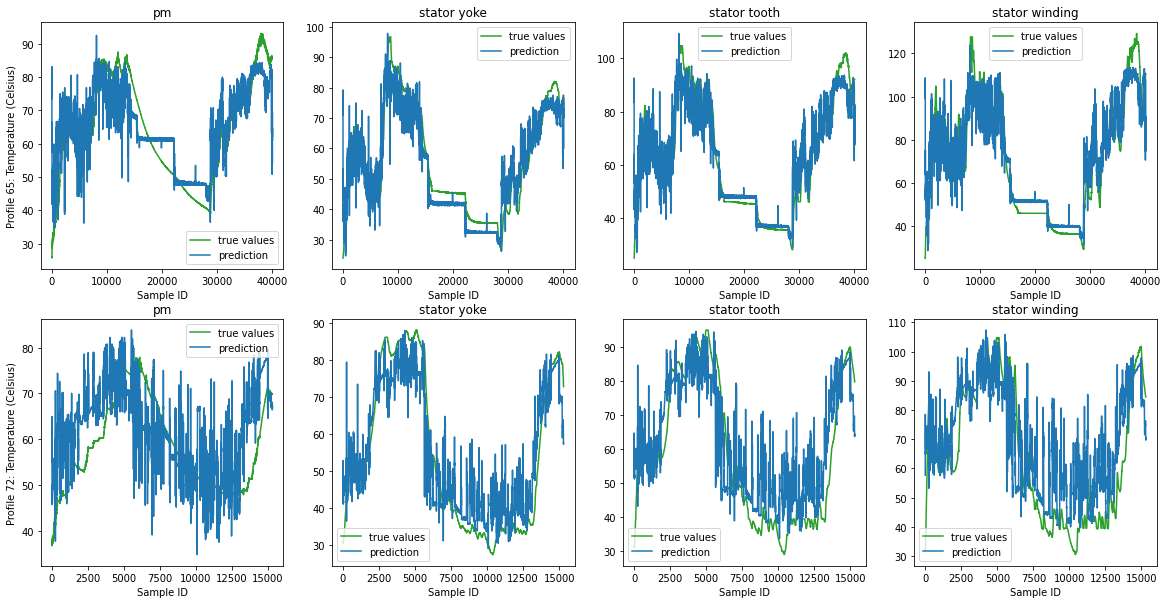

In [200]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
ax = axes[0, 0]
ax.plot(y_test_nn3_65.iloc[:,0], color='tab:green', label="true values")
ax.plot(Y_pred_3_65[:,0], color='tab:blue', label="prediction")
#ax.set_ylabel('Profile 65')
ax.set_ylabel('Profile 65: Temperature (Celsius)')
ax.set_xlabel('Sample ID')
ax.set_title("pm")
ax.legend()

ax = axes[0, 1]
ax.plot(y_test_nn3_65.iloc[:,1], color='tab:green', label="true values")
ax.plot(Y_pred_3_65[:,1], color='tab:blue', label="prediction")
#ax.set_ylabel('Temperature ')
ax.set_xlabel('Sample ID')
ax.set_title("stator yoke")
ax.legend()

ax = axes[0, 2]
ax.plot(y_test_nn3_65.iloc[:,2], color='tab:green', label="true values")
ax.plot(Y_pred_3_65[:,2], color='tab:blue', label="prediction")
#ax.set_ylabel('Temperature ')
ax.set_xlabel('Sample ID')
ax.set_title("stator tooth")
ax.legend()

ax = axes[0, 3]
ax.plot(y_test_nn3_65.iloc[:,3], color='tab:green', label="true values")
ax.plot(Y_pred_3_65[:,3], color='tab:blue', label="prediction")
#ax.set_ylabel('Temperature ')
ax.set_xlabel('Sample ID')
ax.set_title("stator winding")
ax.legend()

ax = axes[1, 0]
ax.plot(y_test_nn3_72.iloc[:,0], color='tab:green', label="true values")
ax.plot(Y_pred_3_72[:,0], color='tab:blue', label="prediction")
#ax.set_ylabel('Profile 72')
ax.set_xlabel('Sample ID')
ax.set_ylabel('Profile 72: Temperature (Celsius)')
ax.set_title("pm")
ax.legend()

ax = axes[1, 1]
ax.plot(y_test_nn3_72.iloc[:,1], color='tab:green', label="true values")
ax.plot(Y_pred_3_72[:,1], color='tab:blue', label="prediction")
#ax.set_ylabel('Temperature ')
ax.set_xlabel('Sample ID')
ax.set_title("stator yoke")
ax.legend()

ax = axes[1, 2]
ax.plot(y_test_nn3_72.iloc[:,2], color='tab:green', label="true values")
ax.plot(Y_pred_3_72[:,2], color='tab:blue', label="prediction")
#ax.set_ylabel('Temperature ')
ax.set_xlabel('Sample ID')
ax.set_title("stator tooth")
ax.legend()

ax = axes[1, 3]
ax.plot(y_test_nn3_72.iloc[:,3], color='tab:green', label="true values")
ax.plot(Y_pred_3_72[:,3], color='tab:blue', label="prediction")
#ax.set_ylabel('Temperature ')
ax.set_xlabel('Sample ID')
ax.set_title("stator winding")
ax.legend()
#ax.set_xlabel('Prediction vs Actual: x,y axes represent test set sample IDs and the temperature readings in Celsius', fontsize=20)

# 4 - Neural Network 4
 we will only use the actual values of the input variables to predict 

## Step 1: Build the model

In [38]:
nr_epochs=100
b_size=1000

NN_reg_model = Sequential()
NN_reg_model.add(Dense(9, input_shape=([len(X_train.keys())]), activation='relu'))
NN_reg_model.add(Dense(7, activation='relu'))
NN_reg_model.add(Dense(5, activation='relu'))
NN_reg_model.add(Dense(4))
NN_reg_model.compile(loss='mean_squared_error', optimizer='adam',metrics = ['accuracy'])

## Step 2: Train the model

In [39]:
history_4 = NN_reg_model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=nr_epochs, batch_size=b_size, verbose=1)

Epoch 1/100
1331/1331 [==============================] - 6s 4ms/step - loss: 5052.4888 - accuracy: 0.6126 - val_loss: 1438.4948 - val_accuracy: 0.5826
Epoch 2/100
1331/1331 [==============================] - 5s 4ms/step - loss: 687.5829 - accuracy: 0.6684 - val_loss: 336.4184 - val_accuracy: 0.6103
Epoch 3/100
1331/1331 [==============================] - 4s 3ms/step - loss: 160.9559 - accuracy: 0.7684 - val_loss: 148.1492 - val_accuracy: 0.7602
Epoch 4/100
1331/1331 [==============================] - 4s 3ms/step - loss: 138.1361 - accuracy: 0.7736 - val_loss: 145.2578 - val_accuracy: 0.7617
Epoch 5/100
1331/1331 [==============================] - 4s 3ms/step - loss: 133.5445 - accuracy: 0.8042 - val_loss: 142.8216 - val_accuracy: 0.7601
Epoch 6/100
1331/1331 [==============================] - 4s 3ms/step - loss: 131.2365 - accuracy: 0.8209 - val_loss: 142.2000 - val_accuracy: 0.7591
Epoch 7/100
1331/1331 [==============================] - 4s 3ms/step - loss: 129.6422 - accuracy: 0.8222

## Step 3: Plotting Diagrams

### Visualizing Accuracy and Loss

In [40]:
print(history_4.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


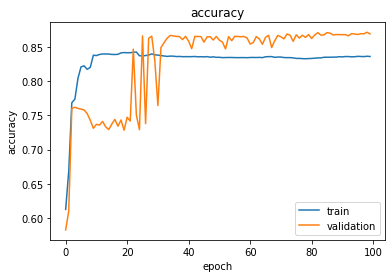

In [41]:
# summarize history for accuracy
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

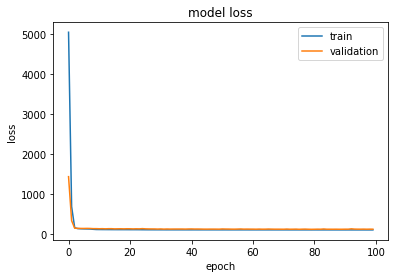

In [42]:
# summarize history for loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## Step 4: Evaluating the model

### Test Evaluation

In [43]:
nn_model_4=NN_reg_model.evaluate(X_test, Y_test)
print(nn_model_4)

1732/1732 [==============================] - 3s 2ms/step - loss: 123.4155 - accuracy: 0.8690
[123.41548156738281, 0.8689593076705933]


### Model Prediction

In [44]:
t1 = time.time()
y_pred_4 = NN_reg_model.predict(X_test)
# Testing has finished 
t2 = time.time()
print( 'Time taken was {} seconds'.format( t2 - t1))

Time taken was 1.9698872566223145 seconds


### Average MSE, MAE, R2 and KMSE Scores

In [201]:
model_4_RMSE=np.mean((y_pred_4 - Y_test)**2, axis=0)
nn_model_4_RMSE= np.sqrt(model_4_RMSE)
print(f"Root mean squared error of target variable is {nn_model_4_RMSE}")

nn_model_4_R2 = r2_score(Y_test, y_pred_4)
print(f"R^2 score of model is {nn_model_4_R2}")

Root mean squared error of target variable is pm                10.861073
stator_yoke        7.126443
stator_tooth      10.261485
stator_winding    14.819413
dtype: float64
R^2 score of model is 0.6756259896369404


In [46]:
mae_nn4 = mean_absolute_error(Y_test, y_pred_4)
print(f"Mean absolute error is {mae_nn4}")
mse_nn4 = mean_squared_error(Y_test, y_pred_4)
print(f"Mean squared error is {mse_nn4}")

Mean absolute error is 8.557222539084576
Mean squared error is 123.41554711901001


## Step 5: Calculating Profile 65 and 72 MSE, MAE, R2 Scores for each Output

In [47]:
X_test.reset_index(drop = True,inplace = True)
Y_test.reset_index(drop = True,inplace = True)

In [48]:
indexes65 = X_test.index[X_test['profile_id']==65].tolist()
indexes72 = X_test.index[X_test['profile_id']==72].tolist()

In [49]:
y_test_nn4_65 = Y_test.iloc[indexes65]
y_test_nn4_72 = Y_test.iloc[indexes72]

In [50]:
X_test_nn4_65 = X_test.iloc[indexes65]
X_test_nn4_72 = X_test.iloc[indexes72]

### Model Prediction of Profiles (65 & 72)

In [51]:
t1 = time.time()
Y_pred_4_65 = []
for i in indexes65:
  Y_pred_4_65.append(y_pred_4[i])

Y_pred_4_65 = np.array(Y_pred_4_65)
# Testing has finished 
t2 = time.time()
print( 'Time taken was {} seconds'.format( t2 - t1))

Time taken was 0.027452707290649414 seconds


In [52]:
t1 = time.time()
Y_pred_4_72 = []
for i in indexes72:
  Y_pred_4_72.append(y_pred_4[i])

Y_pred_4_72 = np.array(Y_pred_4_72)
# Testing has finished 
t2 = time.time()
print( 'Time taken was {} seconds'.format( t2 - t1))

Time taken was 0.01070857048034668 seconds


### Mean Average Perfomance (mAP) (MSE, MAE & R2)

In [211]:
NN4_MSE_65 = mean_squared_error(y_test_nn4_65, Y_pred_4_65)
print("Profile 65 MSE: {0}".format(NN4_MSE_65))
NN4_MSE_72 = mean_squared_error(y_test_nn4_72, Y_pred_4_72)
print("Profile 72 MSE: {0}".format(NN4_MSE_72))

NN4_MAE_65 = mean_absolute_error(y_test_nn4_65, Y_pred_4_65)
print("Profile 65 MAE: {0}".format(NN4_MAE_65))
NN4_MAE_72 = mean_absolute_error(y_test_nn4_72, Y_pred_4_72)
print("Profile 72 MAE: {0}".format(NN4_MAE_72))

r2_NN4_65 = r2_score(y_test_nn4_65, Y_pred_4_65)
print(f"Profile 65 R^2 score of model is {r2_NN4_65}")
r2_NN4_72 = r2_score(y_test_nn4_72, Y_pred_4_72)
print(f"Profile 72 R^2 score of model is {r2_NN4_72}")

Profile 65 MSE: 107.26685522723704
Profile 72 MSE: 165.73079793325437
Profile 65 MAE: 7.994037860060871
Profile 72 MAE: 10.032964420058244
Profile 65 R^2 score of model is 0.7400711819539887
Profile 72 R^2 score of model is 0.3079267683155988


### MAE for Profiles 65 & 72

MAE for Profile 65 

In [53]:
mae_nn4_65_1 = mean_absolute_error(y_test_nn4_65.iloc[:,0], Y_pred_4_65[:,0])
print(f"Proile 65: PM mae is {mae_nn4_65_1}")
mae_nn4_65_2 = mean_absolute_error(y_test_nn4_65.iloc[:,1], Y_pred_4_65[:,1])
print(f"Proile 65: Stator Yoke mae is {mae_nn4_65_2}")
mae_nn4_65_3 = mean_absolute_error(y_test_nn4_65.iloc[:,2], Y_pred_4_65[:,2])
print(f"Proile 65: Stator tooth mae is {mae_nn4_65_3}")
mae_nn4_65_4 = mean_absolute_error(y_test_nn4_65.iloc[:,3], Y_pred_4_65[:,3])
print(f"Proile 65: Stator Winding mae is {mae_nn4_65_4}")

Proile 65: PM mae is 8.283063008078466
Proile 65: Stator Yoke mae is 4.186871807724865
Proile 65: Stator tooth mae is 7.587977981392332
Proile 65: Stator Winding mae is 11.918238643048024


MAE for Profile 72

In [54]:
mae_nn4_72_1 = mean_absolute_error(y_test_nn4_72.iloc[:,0], Y_pred_4_72[:,0])
print(f"Proile 72: PM mae is {mae_nn4_72_1}")
mae_nn4_72_2 = mean_absolute_error(y_test_nn4_72.iloc[:,1], Y_pred_4_72[:,1])
print(f"Proile 72: Stator Yoke mae is {mae_nn4_72_2}")
mae_nn4_72_3 = mean_absolute_error(y_test_nn4_72.iloc[:,2], Y_pred_4_72[:,2])
print(f"Proile 72: Stator tooth mae is {mae_nn4_72_3}")
mae_nn4_72_4 = mean_absolute_error(y_test_nn4_72.iloc[:,3], Y_pred_4_72[:,3])
print(f"Proile 72: Stator Winding mae is {mae_nn4_72_4}")

Proile 72: PM mae is 10.327537453998723
Proile 72: Stator Yoke mae is 7.702645739444172
Proile 72: Stator tooth mae is 9.78479303771191
Proile 72: Stator Winding mae is 12.31688144907816


### MSE for Profiles 65 & 72

MSE for Profile 65 

In [55]:
NN4_MSE_65 = mean_squared_error(y_test_nn4_65.iloc[:,0], Y_pred_4_65[:,0])
print("Proile 65: PM MSE: {0}".format(NN4_MSE_65))
NN4_MSE1_65 = mean_squared_error(y_test_nn4_65.iloc[:,1], Y_pred_4_65[:,1])
print("Proile 65: Stator Yoke MSE: {0}".format(NN4_MSE1_65))
NN4_MSE2_65 = mean_squared_error(y_test_nn4_65.iloc[:,2], Y_pred_4_65[:,2])
print("Proile 65: Stator tooth MSE: {0}".format(NN4_MSE2_65))
NN4_MSE3_65 = mean_squared_error(y_test_nn4_65.iloc[:,3], Y_pred_4_65[:,3])
print("Proile 65: Stator Winding MSE: {0}".format(NN4_MSE3_65))

Proile 65: PM MSE: 106.39540583546432
Proile 65: Stator Yoke MSE: 35.06052616019641
Proile 65: Stator tooth MSE: 85.17584013482852
Proile 65: Stator Winding MSE: 202.43564877845873


MSE for Profile 72

In [56]:
NN4_MSE_72 = mean_squared_error(y_test_nn4_72.iloc[:,0], Y_pred_4_72[:,0])
print("Proile 72: PM MSE: {0}".format(NN4_MSE_72))
NN4_MSE1_72 = mean_squared_error(y_test_nn4_72.iloc[:,1], Y_pred_4_72[:,1])
print("Proile 72: Stator Yoke MSE: {0}".format(NN4_MSE1_72))
NN4_MSE2_72 = mean_squared_error(y_test_nn4_72.iloc[:,2], Y_pred_4_72[:,2])
print("Proile 72: Stator tooth MSE: {0}".format(NN4_MSE2_72))
NN4_MSE3_72 = mean_squared_error(y_test_nn4_72.iloc[:,3], Y_pred_4_72[:,3])
print("Proile 72: Stator Winding MSE: {0}".format(NN4_MSE3_72))

Proile 72: PM MSE: 148.27385364546691
Proile 72: Stator Yoke MSE: 91.99297191975104
Proile 72: Stator tooth MSE: 158.02540059207115
Proile 72: Stator Winding MSE: 264.63096557572953


### R2 Scores for Profile 65 & 72

R2 Scores for Profile 65 

In [57]:
NN4_R2_65 = r2_score(y_test_nn4_65.iloc[:,0], Y_pred_4_65[:,0])
print("Proile 65: PM R2: {0}".format(NN4_R2_65))
NN4_R2_65_1 = r2_score(y_test_nn4_65.iloc[:,1], Y_pred_4_65[:,1])
print("Proile 65: Stator Yoke R2: {0}".format(NN4_R2_65_1))
NN4_R2_65_2 = r2_score(y_test_nn4_65.iloc[:,2], Y_pred_4_65[:,2])
print("Proile 65: Stator Tooth R2: {0}".format(NN4_R2_65_2))
NN4_R2_65_3 = r2_score(y_test_nn4_65.iloc[:,3], Y_pred_4_65[:,3])
print("Proile 65: Stator Winding R2: {0}".format(NN4_R2_65_3))

Proile 65: PM R2: 0.5406290498002622
Proile 65: Stator Yoke R2: 0.8828745647001607
Proile 65: Stator Tooth R2: 0.8128915626851767
Proile 65: Stator Winding R2: 0.7238895506303551


R2 Scores for Profile 72

In [58]:
NN4_R2_72 = r2_score(y_test_nn4_72.iloc[:,0], Y_pred_4_72[:,0])
print("Proile 72: PM R2: {0}".format(NN4_R2_72))
NN4_R2_72_1 = r2_score(y_test_nn4_72.iloc[:,1], Y_pred_4_72[:,1])
print("Proile 72: Stator Yoke R2: {0}".format(NN4_R2_72_1))
NN4_R2_72_2 = r2_score(y_test_nn4_72.iloc[:,2], Y_pred_4_72[:,2])
print("Proile 72: Stator Tooth R2: {0}".format(NN4_R2_72_2))
NN4_R2_72_3 = r2_score(y_test_nn4_72.iloc[:,3], Y_pred_4_72[:,3])
print("Proile 72: Stator Winding R2: {0}".format(NN4_R2_72_3))

Proile 72: PM R2: -0.6453865179369207
Proile 72: Stator Yoke R2: 0.7842042294807798
Proile 72: Stator Tooth R2: 0.6262272758159078
Proile 72: Stator Winding R2: 0.4666620859026209


## Step 6: Plotting Actual Vs Predicted Values for Profile 65 and 72 for each output

In [59]:
y_test_nn4_65.reset_index(drop = True,inplace = True)

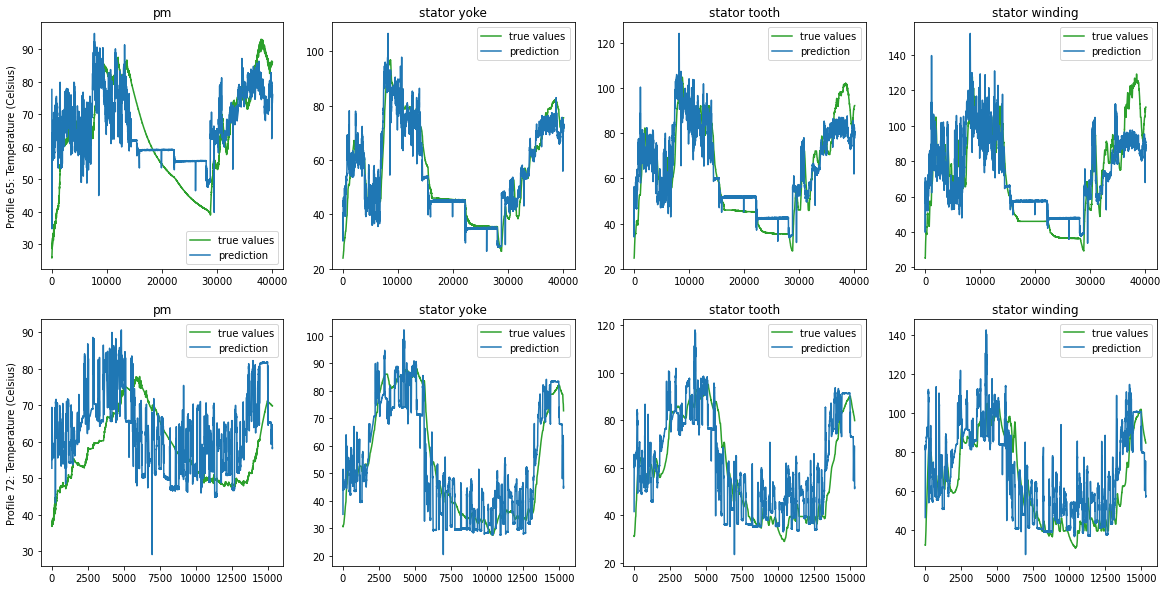

In [60]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
ax = axes[0, 0]
ax.plot(y_test_nn4_65.iloc[:,0], color='tab:green', label="true values")
ax.plot(Y_pred_4_65[:,0], color='tab:blue', label="prediction")
#ax.set_ylabel('Profile 65')
ax.set_ylabel('Profile 65: Temperature (Celsius)')
ax.set_xlabel('Sample ID')
ax.set_title("pm")
ax.legend()

ax = axes[0, 1]
ax.plot(y_test_nn4_65.iloc[:,1], color='tab:green', label="true values")
ax.plot(Y_pred_4_65[:,1], color='tab:blue', label="prediction")
#ax.set_ylabel('Temperature ')
ax.set_xlabel('Sample ID')
ax.set_title("stator yoke")
ax.legend()

ax = axes[0, 2]
ax.plot(y_test_nn4_65.iloc[:,2], color='tab:green', label="true values")
ax.plot(Y_pred_4_65[:,2], color='tab:blue', label="prediction")
#ax.set_ylabel('Temperature ')
ax.set_xlabel('Sample ID')
ax.set_title("stator tooth")
ax.legend()

ax = axes[0, 3]
ax.plot(y_test_nn4_65.iloc[:,3], color='tab:green', label="true values")
ax.plot(Y_pred_4_65[:,3], color='tab:blue', label="prediction")
#ax.set_ylabel('Temperature ')
ax.set_xlabel('Sample ID')
ax.set_title("stator winding")
ax.legend()

ax = axes[1, 0]
ax.plot(y_test_nn4_72.iloc[:,0], color='tab:green', label="true values")
ax.plot(Y_pred_4_72[:,0], color='tab:blue', label="prediction")
#ax.set_ylabel('Profile 72')
ax.set_xlabel('Sample ID')
ax.set_ylabel('Profile 72: Temperature (Celsius)')
ax.set_title("pm")
ax.legend()

ax = axes[1, 1]
ax.plot(y_test_nn4_72.iloc[:,1], color='tab:green', label="true values")
ax.plot(Y_pred_4_72[:,1], color='tab:blue', label="prediction")
#ax.set_ylabel('Temperature ')
ax.set_xlabel('Sample ID')
ax.set_title("stator yoke")
ax.legend()

ax = axes[1, 2]
ax.plot(y_test_nn4_72.iloc[:,2], color='tab:green', label="true values")
ax.plot(Y_pred_4_72[:,2], color='tab:blue', label="prediction")
#ax.set_ylabel('Temperature ')
ax.set_xlabel('Sample ID')
ax.set_title("stator tooth")
ax.legend()

ax = axes[1, 3]
ax.plot(y_test_nn4_72.iloc[:,3], color='tab:green', label="true values")
ax.plot(Y_pred_4_72[:,3], color='tab:blue', label="prediction")
#ax.set_ylabel('Temperature ')
ax.set_title("stator winding")
ax.set_xlabel('Sample ID')
ax.legend()
#ax.set_xlabel('Prediction vs Actual: x,y axes represent test set sample IDs and the temperature readings in Celsius', fontsize=20)

# 5 - Linear Regression

## Step 1: Build the model

In [63]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)

lin_train_acc = (lin_reg.score(X_train,Y_train))*100
lin_test_acc = (lin_reg.score(X_test,Y_test))*100

print(f"Train accuracy: {lin_train_acc}")
# printf("Train accuracy is %f", l_train_acc)
print(f"Test accuracy: {lin_test_acc}")

Train accuracy: 73.46574409558836
Test accuracy: 58.27155669075339


## Step 2: Model Prediction

In [64]:
t1 = time.time()
Y_pred_lin = lin_reg.predict(X_test)
# Testing has finished 
t2 = time.time()
print( 'Time taken was {} seconds'.format( t2 - t1))

Time taken was 0.020724058151245117 seconds


### Average MSE, MAE, R2 and KMSE Scores

In [65]:
from numpy import sqrt 
mae_lin = mean_absolute_error(Y_test, Y_pred_lin)
print(f"Mean absolute error is {mae_lin}")

Mean absolute error is 9.932593105281157


In [66]:
lin_MSE = mean_squared_error(Y_test, Y_pred_lin)
print("MSE: {0}".format(lin_MSE))

MSE: 160.48330203659106


In [67]:
lin_RMSE=np.mean((Y_pred_lin - Y_test)**2, axis=0)
rms_lin= np.sqrt(lin_RMSE)
print(f"Root mean squared error of target variable is {rms_lin}")

r2_lin = r2_score(Y_test, Y_pred_lin)
print(f"R^2 score of model is {r2_lin}")

Root mean squared error of target variable is pm                12.138159
stator_yoke        7.841091
stator_tooth      12.262284
stator_winding    16.815230
dtype: float64
R^2 score of model is 0.5827155669075339


## Step 3: Calculating Profile 65 and 72 MSE, MAE, R2 Scores for each Output

In [68]:
X_test.reset_index(drop = True,inplace = True)
Y_test.reset_index(drop = True,inplace = True)

In [69]:
indexes65 = X_test.index[X_test['profile_id']==65].tolist()
indexes72 = X_test.index[X_test['profile_id']==72].tolist()

In [70]:
y_test_lin_65 = Y_test.iloc[indexes65]
y_test_lin_72 = Y_test.iloc[indexes72]

In [71]:
X_test_lin_65 = X_test.iloc[indexes65]
X_test_lin_72 = X_test.iloc[indexes72]

### Model Prediction of Profiles (65 & 72)

In [72]:
t1 = time.time()
Y_pred_lin_65 = []
for i in indexes65:
  Y_pred_lin_65.append(Y_pred_lin[i])

Y_pred_lin_65 = np.array(Y_pred_lin_65)
# Testing has finished 
t2 = time.time()
print( 'Time taken was {} seconds'.format( t2 - t1))

Time taken was 0.03259849548339844 seconds


In [73]:
t1 = time.time()
Y_pred_lin_72 = []
for i in indexes72:
  Y_pred_lin_72.append(Y_pred_lin[i])

Y_pred_lin_72 = np.array(Y_pred_lin_72)
# Testing has finished 
t2 = time.time()
print( 'Time taken was {} seconds'.format( t2 - t1))

Time taken was 0.014176368713378906 seconds


### Model Accuracy for Profile 65 an 72

In [74]:
lin_test_acc_65 = (lin_reg.score(X_test_lin_65,y_test_lin_65))*100
print(f"Profile 65 Test accuracy: {lin_test_acc_65}")

Profile 65 Test accuracy: 60.89492286388215


In [75]:
lin_test_acc_72 = (lin_reg.score(X_test_lin_72,y_test_lin_72))*100
print(f"Profile 72 Test accuracy: {lin_test_acc_72}")

Profile 72 Test accuracy: 37.96785057008487


### Mean Average Perfomance (mAP) (MSE, MAE & R2)

In [208]:
lin_MSE_65 = mean_squared_error(y_test_lin_65, Y_pred_lin_65)
print("Profile 65 MSE: {0}".format(lin_MSE_65))
lin_MSE_72 = mean_squared_error(y_test_lin_72, Y_pred_lin_72)
print("Profile 72 MSE: {0}".format(lin_MSE_72))

lin_MAE_65 = mean_absolute_error(y_test_lin_65, Y_pred_lin_65)
print("Profile 65 MAE: {0}".format(lin_MAE_65))
lin_MAE_72 = mean_absolute_error(y_test_lin_72, Y_pred_lin_72)
print("Profile 72 MAE: {0}".format(lin_MAE_72))

r2_lin_65 = r2_score(y_test_lin_65, Y_pred_lin_65)
print(f"Profile 65 R^2 score of model is {r2_lin_65}")
r2_lin_72 = r2_score(y_test_lin_72, Y_pred_lin_72)
print(f"Profile 72 R^2 score of model is {r2_lin_72}")

Profile 65 MSE: 158.00336679649928
Profile 72 MSE: 166.98160433815406
Profile 65 MAE: 10.131563069893996
Profile 72 MAE: 9.41122183796623
Profile 65 R^2 score of model is 0.6089492286388215
Profile 72 R^2 score of model is 0.3796785057008487


### MAE for Profiles 65 & 72

MAE for Profile 65

In [76]:
mae_lin_65_1 = mean_absolute_error(y_test_lin_65.iloc[:,0], Y_pred_lin_65[:,0])
print(f"Proile 65: PM mae is {mae_lin_65_1}")
mae_lin_65_2 = mean_absolute_error(y_test_lin_65.iloc[:,1], Y_pred_lin_65[:,1])
print(f"Proile 65: Stator Yoke mae is {mae_lin_65_2}")
mae_lin_65_3 = mean_absolute_error(y_test_lin_65.iloc[:,2], Y_pred_lin_65[:,2])
print(f"Proile 65: Stator tooth mae is {mae_lin_65_3}")
mae_lin_65_4 = mean_absolute_error(y_test_lin_65.iloc[:,3], Y_pred_lin_65[:,3])
print(f"Proile 65: Stator Winding mae is {mae_lin_65_4}")

Proile 65: PM mae is 10.463088081306866
Proile 65: Stator Yoke mae is 6.365382025223159
Proile 65: Stator tooth mae is 10.028033346052306
Proile 65: Stator Winding mae is 13.669748826993546


MAE for Profile 72

In [77]:
mae_lin_72_1 = mean_absolute_error(y_test_lin_72.iloc[:,0], Y_pred_lin_72[:,0])
print(f"Proile 72: PM mae is {mae_lin_72_1}")
mae_lin_72_2 = mean_absolute_error(y_test_lin_72.iloc[:,1], Y_pred_lin_72[:,1])
print(f"Proile 72: Stator Yoke mae is {mae_lin_72_2}")
mae_lin_72_3 = mean_absolute_error(y_test_lin_72.iloc[:,2], Y_pred_lin_72[:,2])
print(f"Proile 72: Stator tooth mae is {mae_lin_72_3}")
mae_lin_72_4 = mean_absolute_error(y_test_lin_72.iloc[:,3], Y_pred_lin_72[:,3])
print(f"Proile 72: Stator Winding mae is {mae_lin_72_4}")

Proile 72: PM mae is 8.382478311513347
Proile 72: Stator Yoke mae is 6.4092599336160285
Proile 72: Stator tooth mae is 9.906492525144511
Proile 72: Stator Winding mae is 12.94665658159107


### MSE for Profiles 65 & 72

MSE for Profile 65 

In [78]:
lin_MSE_65 = mean_squared_error(y_test_lin_65.iloc[:,0], Y_pred_lin_65[:,0])
print("Proile 65: PM MSE: {0}".format(lin_MSE_65))
lin_MSE1_65 = mean_squared_error(y_test_lin_65.iloc[:,1], Y_pred_lin_65[:,1])
print("Proile 65: Stator Yoke MSE: {0}".format(lin_MSE1_65))
lin_MSE2_65 = mean_squared_error(y_test_lin_65.iloc[:,2], Y_pred_lin_65[:,2])
print("Proile 65: Stator tooth MSE: {0}".format(lin_MSE2_65))
lin_MSE3_65 = mean_squared_error(y_test_lin_65.iloc[:,3], Y_pred_lin_65[:,3])
print("Proile 65: Stator Winding MSE: {0}".format(lin_MSE3_65))

Proile 65: PM MSE: 159.39185901208685
Proile 65: Stator Yoke MSE: 57.053576024011456
Proile 65: Stator tooth MSE: 142.42269513359588
Proile 65: Stator Winding MSE: 273.1453370163048


MSE for Profile 72

In [79]:
lin_MSE_72 = mean_squared_error(y_test_lin_72.iloc[:,0], Y_pred_lin_72[:,0])
print("Proile 72: PM MSE: {0}".format(lin_MSE_72))
lin_MSE1_72 = mean_squared_error(y_test_lin_72.iloc[:,1], Y_pred_lin_72[:,1])
print("Proile 72: Stator Yoke MSE: {0}".format(lin_MSE1_72))
lin_MSE2_72 = mean_squared_error(y_test_lin_72.iloc[:,2], Y_pred_lin_72[:,2])
print("Proile 72: Stator tooth MSE: {0}".format(lin_MSE2_72))
lin_MSE3_72 = mean_squared_error(y_test_lin_72.iloc[:,3], Y_pred_lin_72[:,3])
print("Proile 72: Stator Winding MSE: {0}".format(lin_MSE3_72))

Proile 72: PM MSE: 115.7414645282265
Proile 72: Stator Yoke MSE: 73.08858900488798
Proile 72: Stator tooth MSE: 171.17162076239958
Proile 72: Stator Winding MSE: 307.9247430571016


### R2 Scores for Profile 65 & 72

R2 Scores for Profile 65

In [80]:
lin_R2_65 = r2_score(y_test_lin_65.iloc[:,0], Y_pred_lin_65[:,0])
print("Proile 65: PM R2: {0}".format(lin_R2_65))
lin_R2_65_1 = r2_score(y_test_lin_65.iloc[:,1], Y_pred_lin_65[:,1])
print("Proile 65: Stator Yoke R2: {0}".format(lin_R2_65_1))
lin_R2_65_2 = r2_score(y_test_lin_65.iloc[:,2], Y_pred_lin_65[:,2])
print("Proile 65: Stator Tooth R2: {0}".format(lin_R2_65_2))
lin_R2_65_3 = r2_score(y_test_lin_65.iloc[:,3], Y_pred_lin_65[:,3])
print("Proile 65: Stator Winding R2: {0}".format(lin_R2_65_3))

Proile 65: PM R2: 0.31181248707565057
Proile 65: Stator Yoke R2: 0.8094031761904574
Proile 65: Stator Tooth R2: 0.6871356022737249
Proile 65: Stator Winding R2: 0.6274456490154501


R2 Scores for Profile 72

In [81]:
lin_R2_72 = r2_score(y_test_lin_72.iloc[:,0], Y_pred_lin_72[:,0])
print("Proile 72: PM R2: {0}".format(lin_R2_72))
lin_R2_72_1 = r2_score(y_test_lin_72.iloc[:,1], Y_pred_lin_72[:,1])
print("Proile 72: Stator Yoke R2: {0}".format(lin_R2_72_1))
lin_R2_72_2 = r2_score(y_test_lin_72.iloc[:,2], Y_pred_lin_72[:,2])
print("Proile 72: Stator Tooth R2: {0}".format(lin_R2_72_2))
lin_R2_72_3 = r2_score(y_test_lin_72.iloc[:,3], Y_pred_lin_72[:,3])
print("Proile 72: Stator Winding R2: {0}".format(lin_R2_72_3))

Proile 72: PM R2: -0.2843764468169294
Proile 72: Stator Yoke R2: 0.8285498549364064
Proile 72: Stator Tooth R2: 0.5951329168876758
Proile 72: Stator Winding R2: 0.37940769779623995


## Step 4: Plotting Actual Vs Predicted Values for Profile 65 and 72 for each output

In [82]:
y_test_lin_65.reset_index(drop = True,inplace = True)

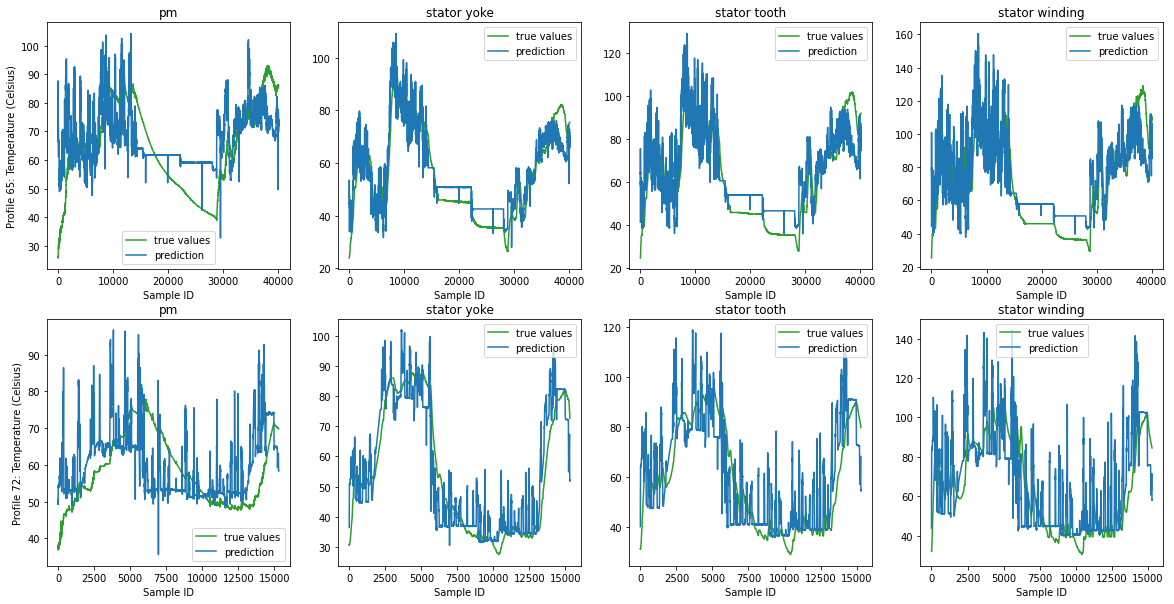

In [83]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
ax = axes[0, 0]
ax.plot(y_test_lin_65.iloc[:,0], color='tab:green', label="true values")
ax.plot(Y_pred_lin_65[:,0], color='tab:blue', label="prediction")
#ax.set_ylabel('Profile 65')
ax.set_ylabel('Profile 65: Temperature (Celsius)')
ax.set_xlabel('Sample ID')
ax.set_title("pm")
ax.legend()

ax = axes[0, 1]
ax.plot(y_test_lin_65.iloc[:,1], color='tab:green', label="true values")
ax.plot(Y_pred_lin_65[:,1], color='tab:blue', label="prediction")
#ax.set_ylabel('Temperature ')
ax.set_xlabel('Sample ID')
ax.set_title("stator yoke")
ax.legend()

ax = axes[0, 2]
ax.plot(y_test_lin_65.iloc[:,2], color='tab:green', label="true values")
ax.plot(Y_pred_lin_65[:,2], color='tab:blue', label="prediction")
#ax.set_ylabel('Temperature ')
ax.set_xlabel('Sample ID')
ax.set_title("stator tooth")
ax.legend()

ax = axes[0, 3]
ax.plot(y_test_lin_65.iloc[:,3], color='tab:green', label="true values")
ax.plot(Y_pred_lin_65[:,3], color='tab:blue', label="prediction")
#ax.set_ylabel('Temperature ')
ax.set_xlabel('Sample ID')
ax.set_title("stator winding")
ax.legend()

ax = axes[1, 0]
ax.plot(y_test_lin_72.iloc[:,0], color='tab:green', label="true values")
ax.plot(Y_pred_lin_72[:,0], color='tab:blue', label="prediction")
#ax.set_ylabel('Profile 72')
ax.set_xlabel('Sample ID')
ax.set_ylabel('Profile 72: Temperature (Celsius)')
ax.set_title("pm")
ax.legend()

ax = axes[1, 1]
ax.plot(y_test_lin_72.iloc[:,1], color='tab:green', label="true values")
ax.plot(Y_pred_lin_72[:,1], color='tab:blue', label="prediction")
#ax.set_ylabel('Temperature ')
ax.set_xlabel('Sample ID')
ax.set_title("stator yoke")
ax.legend()

ax = axes[1, 2]
ax.plot(y_test_lin_72.iloc[:,2], color='tab:green', label="true values")
ax.plot(Y_pred_lin_72[:,2], color='tab:blue', label="prediction")
#ax.set_ylabel('Temperature ')
ax.set_xlabel('Sample ID')
ax.set_title("stator tooth")
ax.legend()

ax = axes[1, 3]
ax.plot(y_test_lin_72.iloc[:,3], color='tab:green', label="true values")
ax.plot(Y_pred_lin_72[:,3], color='tab:blue', label="prediction")
#ax.set_ylabel('Temperature ')
ax.set_xlabel('Sample ID')
ax.set_title("stator winding")
ax.legend()
#ax.set_xlabel('Prediction vs Actual: x,y axes represent test set sample IDs and the temperature readings in Celsius', fontsize=20)

# 6 - KNN

## Step 1: Build the model

In [84]:
knn_reg = KNeighborsRegressor(n_neighbors=2,p=2,metric='minkowski')
knn_reg.fit(X_train,Y_train)

knn_train_acc = (knn_reg.score(X_train,Y_train))*100
knn_test_acc = (knn_reg.score(X_test,Y_test))*100

print(f"Train accuracy: {knn_train_acc}")
print(f"Test accuracy: {knn_test_acc}")

Train accuracy: 98.16603865668768
Test accuracy: 94.63907063016744


## Step 2: Model Prediction

In [85]:
t1 = time.time()
Y_pred_k = knn_reg.predict(X_test)
# Testing has finished 
t2 = time.time()
print( 'Time taken was {} seconds'.format( t2 - t1))

Time taken was 1.9978055953979492 seconds


### Average MSE, MAE, R2 and KMSE Scores

In [86]:
knn_RMSE=np.mean((Y_pred_k - Y_test)**2, axis=0)
rms_knn= np.sqrt(knn_RMSE)
print(f"Root mean squared error of target variable is {rms_knn}")

r2_knn = r2_score(Y_test, Y_pred_k)
print(f"R^2 score of model is {r2_knn}")


Root mean squared error of target variable is pm                4.401378
stator_yoke       2.989832
stator_tooth      4.321622
stator_winding    5.804362
dtype: float64
R^2 score of model is 0.9463907063016743


In [87]:
knn_MSE = mean_squared_error(Y_test, Y_pred_k)
print("MSE: {0}".format(knn_MSE))

MSE: 20.16956469209157


In [88]:
mae_knn = mean_absolute_error(Y_test, Y_pred_k)
print(f"Mean absolute error is {mae_knn}")

Mean absolute error is 2.2624160614888913


## Step 3: Calculating Profile 65 and 72 MSE, MAE, R2 Scores for each Output

In [89]:
X_test.reset_index(drop = True,inplace = True)
Y_test.reset_index(drop = True,inplace = True)

In [90]:
indexes65 = X_test.index[X_test['profile_id']==65].tolist()
indexes72 = X_test.index[X_test['profile_id']==72].tolist()

In [91]:
y_test_knn_65 = Y_test.iloc[indexes65]
y_test_knn_72 = Y_test.iloc[indexes72]

In [92]:
X_test_knn_65 = X_test.iloc[indexes65]
X_test_knn_72 = X_test.iloc[indexes72]

### Model Prediction of Profiles (65 & 72)

In [93]:
t1 = time.time()
Y_pred_knn_65 = []
for i in indexes65:
  Y_pred_knn_65.append(Y_pred_k[i])

Y_pred_knn_65 = np.array(Y_pred_knn_65)
# Testing has finished 
t2 = time.time()
print( 'Time taken was {} seconds'.format( t2 - t1))

Time taken was 0.13139605522155762 seconds


In [94]:
t1 = time.time()
Y_pred_knn_72 = []
for i in indexes72:
  Y_pred_knn_72.append(Y_pred_k[i])

Y_pred_knn_72 = np.array(Y_pred_knn_72)
# Testing has finished 
t2 = time.time()
print( 'Time taken was {} seconds'.format( t2 - t1))

Time taken was 0.0595707893371582 seconds


### Model Accuracy for Profile 65 an 72

In [95]:
knn_test_acc_65 = (knn_reg.score(X_test_knn_65,y_test_knn_65))*100
print(f"Profile 65 Test accuracy: {knn_test_acc_65}")

Profile 65 Test accuracy: 95.51553975189985


In [96]:
knn_test_acc_72 = (knn_reg.score(X_test_knn_72,y_test_knn_72))*100
print(f"Profile 72 Test accuracy: {knn_test_acc_72}")

Profile 72 Test accuracy: 89.0875767554109


### Mean Average Perfomance (mAP) (MSE, MAE & R2)

In [207]:
knn_MSE_65 = mean_squared_error(y_test_knn_65, Y_pred_knn_65)
print("Profile 65 MSE: {0}".format(knn_MSE_65))
knn_MSE_72 = mean_squared_error(y_test_knn_72, Y_pred_knn_72)
print("Profile 72 MSE: {0}".format(knn_MSE_72))

knn_MAE_65 = mean_absolute_error(y_test_knn_65, Y_pred_knn_65)
print("Profile 65 MAE: {0}".format(knn_MAE_65))
knn_MAE_72 = mean_absolute_error(y_test_knn_72, Y_pred_knn_72)
print("Profile 72 MAE: {0}".format(knn_MAE_72))

r2_knn_65 = r2_score(y_test_knn_65, Y_pred_knn_65)
print(f"Profile 65 R^2 score of model is {r2_knn_65}")
r2_knn_72 = r2_score(y_test_knn_72, Y_pred_knn_72)
print(f"Profile 72 R^2 score of model is {r2_knn_72}")

Profile 65 MSE: 17.910634601717135
Profile 72 MSE: 26.088755793553723
Profile 65 MAE: 2.108760421594364
Profile 72 MAE: 2.6650478650265916
Profile 65 R^2 score of model is 0.9551553975189985
Profile 72 R^2 score of model is 0.8908757675541089


### MAE for Profiles 65 & 72

MAE for Profile 65

In [97]:
mae_knn_65_1 = mean_absolute_error(y_test_knn_65.iloc[:,0], Y_pred_knn_65[:,0])
print(f"Proile 65: PM mae is {mae_knn_65_1}")
mae_knn_65_2 = mean_absolute_error(y_test_knn_65.iloc[:,1], Y_pred_knn_65[:,1])
print(f"Proile 65: Stator Yoke mae is {mae_knn_65_2}")
mae_knn_65_3 = mean_absolute_error(y_test_knn_65.iloc[:,2], Y_pred_knn_65[:,2])
print(f"Proile 65: Stator tooth mae is {mae_knn_65_3}")
mae_knn_65_4 = mean_absolute_error(y_test_knn_65.iloc[:,3], Y_pred_knn_65[:,3])
print(f"Proile 65: Stator Winding mae is {mae_knn_65_4}")

Proile 65: PM mae is 2.2728690000745084
Proile 65: Stator Yoke mae is 1.3814360567699733
Proile 65: Stator tooth mae is 2.013494947553277
Proile 65: Stator Winding mae is 2.7672416819797174


MAE for Profile 72

In [98]:
mae_knn_72_1 = mean_absolute_error(y_test_knn_72.iloc[:,0], Y_pred_knn_72[:,0])
print(f"Proile 72: PM mae is {mae_knn_72_1}")
mae_knn_72_2 = mean_absolute_error(y_test_knn_72.iloc[:,1], Y_pred_knn_72[:,1])
print(f"Proile 72: Stator Yoke mae is {mae_knn_72_2}")
mae_knn_72_3 = mean_absolute_error(y_test_knn_72.iloc[:,2], Y_pred_knn_72[:,2])
print(f"Proile 72: Stator tooth mae is {mae_knn_72_3}")
mae_knn_72_4 = mean_absolute_error(y_test_knn_72.iloc[:,3], Y_pred_knn_72[:,3])
print(f"Proile 72: Stator Winding mae is {mae_knn_72_4}")

Proile 72: PM mae is 2.5146765113856735
Proile 72: Stator Yoke mae is 1.7887030206880667
Proile 72: Stator tooth mae is 2.699199846197615
Proile 72: Stator Winding mae is 3.657612081835038


### MSE for Profiles 65 & 72

MSE for Profile 65

In [99]:
knn_MSE_65 = mean_squared_error(y_test_knn_65.iloc[:,0], Y_pred_knn_65[:,0])
print("Proile 65: PM MSE: {0}".format(knn_MSE_65))
knn_MSE1_65 = mean_squared_error(y_test_knn_65.iloc[:,1], Y_pred_knn_65[:,1])
print("Proile 65: Stator Yoke MSE: {0}".format(knn_MSE1_65))
knn_MSE2_65 = mean_squared_error(y_test_knn_65.iloc[:,2], Y_pred_knn_65[:,2])
print("Proile 65: Stator tooth MSE: {0}".format(knn_MSE2_65))
knn_MSE3_65 = mean_squared_error(y_test_knn_65.iloc[:,3], Y_pred_knn_65[:,3])
print("Proile 65: Stator Winding MSE: {0}".format(knn_MSE3_65))

Proile 65: PM MSE: 17.791232781536802
Proile 65: Stator Yoke MSE: 7.8843545661816234
Proile 65: Stator tooth MSE: 16.24428122293784
Proile 65: Stator Winding MSE: 29.722669836212017


MSE for Profile 72

In [100]:
knn_MSE_72 = mean_squared_error(y_test_knn_72.iloc[:,0], Y_pred_knn_72[:,0])
print("Proile 72: PM MSE: {0}".format(knn_MSE_72))
knn_MSE1_72 = mean_squared_error(y_test_knn_72.iloc[:,1], Y_pred_knn_72[:,1])
print("Proile 72: Stator Yoke MSE: {0}".format(knn_MSE1_72))
knn_MSE2_72 = mean_squared_error(y_test_knn_72.iloc[:,2], Y_pred_knn_72[:,2])
print("Proile 72: Stator tooth MSE: {0}".format(knn_MSE2_72))
knn_MSE3_72 = mean_squared_error(y_test_knn_72.iloc[:,3], Y_pred_knn_72[:,3])
print("Proile 72: Stator Winding MSE: {0}".format(knn_MSE3_72))

Proile 72: PM MSE: 23.514636703682353
Proile 72: Stator Yoke MSE: 11.702883627819464
Proile 72: Stator tooth MSE: 25.049471986507555
Proile 72: Stator Winding MSE: 44.08803085620537


### R2 Scores for Profile 65 & 72

R2 Scores for Profile 65

In [101]:
knn_R2_65 = r2_score(y_test_knn_65.iloc[:,0], Y_pred_knn_65[:,0])
print("Proile 65: PM R2: {0}".format(knn_R2_65))
knn_R2_65_1 = r2_score(y_test_knn_65.iloc[:,1], Y_pred_knn_65[:,1])
print("Proile 65: Stator Yoke R2: {0}".format(knn_R2_65_1))
knn_R2_65_2 = r2_score(y_test_knn_65.iloc[:,2], Y_pred_knn_65[:,2])
print("Proile 65: Stator Tooth R2: {0}".format(knn_R2_65_2))
knn_R2_65_3 = r2_score(y_test_knn_65.iloc[:,3], Y_pred_knn_65[:,3])
print("Proile 65: Stator Winding R2: {0}".format(knn_R2_65_3))

Proile 65: PM R2: 0.92318488337064
Proile 65: Stator Yoke R2: 0.9736610210467781
Proile 65: Stator Tooth R2: 0.9643156783647199
Proile 65: Stator Winding R2: 0.9594600072938568


R2 Scores for Profile 72

In [102]:
knn_R2_72 = r2_score(y_test_knn_72.iloc[:,0], Y_pred_knn_72[:,0])
print("Proile 72: PM R2: {0}".format(knn_R2_72))
knn_R2_72_1 = r2_score(y_test_knn_72.iloc[:,1], Y_pred_knn_72[:,1])
print("Proile 72: Stator Yoke R2: {0}".format(knn_R2_72_1))
knn_R2_72_2 = r2_score(y_test_knn_72.iloc[:,2], Y_pred_knn_72[:,2])
print("Proile 72: Stator Tooth R2: {0}".format(knn_R2_72_2))
knn_R2_72_3 = r2_score(y_test_knn_72.iloc[:,3], Y_pred_knn_72[:,3])
print("Proile 72: Stator Winding R2: {0}".format(knn_R2_72_3))

Proile 72: PM R2: 0.7390594143527442
Proile 72: Stator Yoke R2: 0.9725475464368615
Proile 72: Stator Tooth R2: 0.9407512377839857
Proile 72: Stator Winding R2: 0.9111448716428445


## Step 4: Plotting Actual Vs Predicted Values for Profile 65 and 72 for each output

In [104]:
y_test_knn_65.reset_index(drop = True,inplace = True)

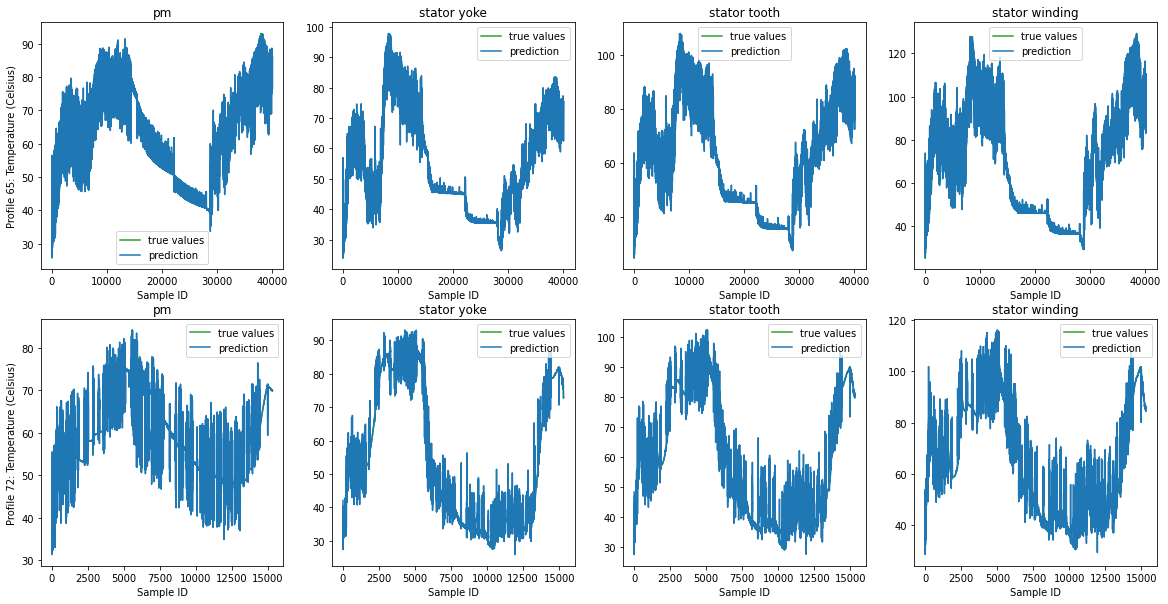

In [105]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
ax = axes[0, 0]
ax.plot(y_test_knn_65.iloc[:,0], color='tab:green', label="true values")
ax.plot(Y_pred_knn_65[:,0], color='tab:blue', label="prediction")
#ax.set_ylabel('Profile 65')
ax.set_ylabel('Profile 65: Temperature (Celsius)')
ax.set_xlabel('Sample ID')
ax.set_title("pm")
ax.legend()

ax = axes[0, 1]
ax.plot(y_test_knn_65.iloc[:,1], color='tab:green', label="true values")
ax.plot(Y_pred_knn_65[:,1], color='tab:blue', label="prediction")
#ax.set_ylabel('Temperature ')
ax.set_xlabel('Sample ID')
ax.set_title("stator yoke")
ax.legend()

ax = axes[0, 2]
ax.plot(y_test_knn_65.iloc[:,2], color='tab:green', label="true values")
ax.plot(Y_pred_knn_65[:,2], color='tab:blue', label="prediction")
#ax.set_ylabel('Temperature ')
ax.set_xlabel('Sample ID')
ax.set_title("stator tooth")
ax.legend()

ax = axes[0, 3]
ax.plot(y_test_knn_65.iloc[:,3], color='tab:green', label="true values")
ax.plot(Y_pred_knn_65[:,3], color='tab:blue', label="prediction")
#ax.set_ylabel('Temperature ')
ax.set_xlabel('Sample ID')
ax.set_title("stator winding")
ax.legend()

ax = axes[1, 0]
ax.plot(y_test_knn_72.iloc[:,0], color='tab:green', label="true values")
ax.plot(Y_pred_knn_72[:,0], color='tab:blue', label="prediction")
#ax.set_ylabel('Profile 72')
ax.set_xlabel('Sample ID')
ax.set_ylabel('Profile 72: Temperature (Celsius)')
ax.set_title("pm")
ax.legend()

ax = axes[1, 1]
ax.plot(y_test_knn_72.iloc[:,1], color='tab:green', label="true values")
ax.plot(Y_pred_knn_72[:,1], color='tab:blue', label="prediction")
#ax.set_ylabel('Temperature ')
ax.set_xlabel('Sample ID')
ax.set_title("stator yoke")
ax.legend()

ax = axes[1, 2]
ax.plot(y_test_knn_72.iloc[:,2], color='tab:green', label="true values")
ax.plot(Y_pred_knn_72[:,2], color='tab:blue', label="prediction")
#ax.set_ylabel('Temperature ')
ax.set_xlabel('Sample ID')
ax.set_title("stator tooth")
ax.legend()

ax = axes[1, 3]
ax.plot(y_test_knn_72.iloc[:,3], color='tab:green', label="true values")
ax.plot(Y_pred_knn_72[:,3], color='tab:blue', label="prediction")
#ax.set_ylabel('Temperature ')
ax.set_xlabel('Sample ID')
ax.set_title("stator winding")
ax.legend()
#ax.set_xlabel('Prediction vs Actual: x,y axes represent test set sample IDs and the temperature readings in Celsius', fontsize=20)

# 7 - Random Forest Regressor

## Step 1: Build the model

In [106]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators = 10, random_state = 0)
RF_model.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

## Step 2: Model Prediction

In [107]:
t1 = time.time()
y_pred_RF = RF_model.predict(X_test)
# Testing has finished 
t2 = time.time()
print( 'Time taken was {} seconds'.format( t2 - t1))

Time taken was 0.10772323608398438 seconds


In [108]:
RF_test_acc = (RF_model.score(X_test,Y_test))*100
print(f"Test accuracy: {RF_test_acc}")

Test accuracy: 99.84729908306743


### Average MSE, MAE, R2 and KMSE Scores

In [109]:
# Calculate MSE and MAE for the entire testset
RF_MSE = mean_squared_error(Y_test, y_pred_RF)
RF_MAE = mean_absolute_error(Y_test, y_pred_RF)
print("MSE: {0}".format(RF_MSE))
print("MAE: {0}".format(RF_MAE))

MSE: 0.5869923855088597
MAE: 0.26622005356062267


In [110]:
RF_RMSE=np.mean((y_pred_RF - Y_test)**2, axis=0)
rms_rf= np.sqrt(RF_RMSE)
print(f"Root mean squared error of target variable is {rms_rf}")

r2_rf = r2_score(Y_test, y_pred_RF)
print(f"R^2 score of model is {r2_rf}")

Root mean squared error of target variable is pm                0.726129
stator_yoke       0.508545
stator_tooth      0.734984
stator_winding    1.010883
dtype: float64
R^2 score of model is 0.9984729908306742


## Step 3: Calculating Profile 65 and 72 MSE, MAE, R2 Scores for each Output

In [224]:
X_test.reset_index(drop = True,inplace = True)
Y_test.reset_index(drop = True,inplace = True)

In [225]:
indexes65 = X_test.index[X_test['profile_id']==65].tolist()
indexes72 = X_test.index[X_test['profile_id']==72].tolist()

In [226]:
y_test_rf_65 = Y_test.iloc[indexes65]
y_test_rf_72 = Y_test.iloc[indexes72]

In [227]:
X_test_rf_65 = X_test.iloc[indexes65]
X_test_rf_72 = X_test.iloc[indexes72]

### Model Prediction of Profiles (65 & 72)

In [228]:
t1 = time.time()
Y_pred_rf_65 = []
for i in indexes65:
  Y_pred_rf_65.append(y_pred_RF[i])

Y_pred_rf_65 = np.array(Y_pred_rf_65)
# Testing has finished 
t2 = time.time()
print( 'Time taken was {} seconds'.format( t2 - t1))

Time taken was 0.027472972869873047 seconds


In [229]:
t1 = time.time()
Y_pred_rf_72 = []
for i in indexes72:
  Y_pred_rf_72.append(y_pred_RF[i])

Y_pred_rf_72 = np.array(Y_pred_rf_72)
# Testing has finished 
t2 = time.time()
print( 'Time taken was {} seconds'.format( t2 - t1))

Time taken was 0.017182350158691406 seconds


### Model Accuracy for Profile 65 an 72

In [230]:
rf_test_acc_65 = (RF_model.score(X_test_rf_65,y_test_rf_65))*100
print(f"Profile 65 Test accuracy: {rf_test_acc_65}")

Profile 65 Test accuracy: 99.87569301916133


In [231]:
rf_test_acc_72 = (RF_model.score(X_test_rf_72,y_test_rf_72))*100
print(f"Profile 72 Test accuracy: {rf_test_acc_72}")

Profile 72 Test accuracy: 99.71239485735275


### Mean Average Perfomance (mAP) (MSE, MAE & R2)

In [232]:
RF_MSE_65 = mean_squared_error(y_test_rf_65, Y_pred_rf_65)
print("Profile 65 MSE: {0}".format(RF_MSE_65))
RF_MSE_72 = mean_squared_error(y_test_rf_72, Y_pred_rf_72)
print("Profile 72 MSE: {0}".format(RF_MSE_72))

RF_MAE_65 = mean_absolute_error(y_test_rf_65, Y_pred_rf_65)
print("Profile 65 MAE: {0}".format(RF_MAE_65))
RF_MAE_72 = mean_absolute_error(y_test_rf_72, Y_pred_rf_72)
print("Profile 72 MAE: {0}".format(RF_MAE_72))

r2_rf_65 = r2_score(y_test_rf_65, Y_pred_rf_65)
print(f"Profile 65 R^2 score of model is {r2_rf_65}")
r2_rf_72 = r2_score(y_test_rf_72, Y_pred_rf_72)
print(f"Profile 72 R^2 score of model is {r2_rf_72}")

Profile 65 MSE: 0.48278827629728593
Profile 72 MSE: 0.8600437909548442
Profile 65 MAE: 0.26008154915067966
Profile 72 MAE: 0.28230509348038363
Profile 65 R^2 score of model is 0.9987569301916133
Profile 72 R^2 score of model is 0.9971239485735275


### MAE for Profiles 65 & 72

MAE for Profile 65

In [233]:
mae_rf_65_1 = mean_absolute_error(y_test_rf_65.iloc[:,0], Y_pred_rf_65[:,0])
print(f"Proile 65: PM mae is {mae_rf_65_1}")
mae_rf_65_2 = mean_absolute_error(y_test_rf_65.iloc[:,1], Y_pred_rf_65[:,1])
print(f"Proile 65: Stator Yoke mae is {mae_rf_65_2}")
mae_rf_65_3 = mean_absolute_error(y_test_rf_65.iloc[:,2], Y_pred_rf_65[:,2])
print(f"Proile 65: Stator tooth mae is {mae_rf_65_3}")
mae_rf_65_4 = mean_absolute_error(y_test_rf_65.iloc[:,3], Y_pred_rf_65[:,3])
print(f"Proile 65: Stator Winding mae is {mae_rf_65_4}")

Proile 65: PM mae is 0.33402565617747937
Proile 65: Stator Yoke mae is 0.14772605463853722
Proile 65: Stator tooth mae is 0.2255935713713989
Proile 65: Stator Winding mae is 0.33298091441530353


MAE for Profile 72

In [234]:
mae_rf_72_1 = mean_absolute_error(y_test_rf_72.iloc[:,0], Y_pred_rf_72[:,0])
print(f"Proile 72: PM mae is {mae_rf_72_1}")
mae_rf_72_2 = mean_absolute_error(y_test_rf_72.iloc[:,1], Y_pred_rf_72[:,1])
print(f"Proile 72: Stator Yoke mae is {mae_rf_72_2}")
mae_rf_72_3 = mean_absolute_error(y_test_rf_72.iloc[:,2], Y_pred_rf_72[:,2])
print(f"Proile 72: Stator tooth mae is {mae_rf_72_3}")
mae_rf_72_4 = mean_absolute_error(y_test_rf_72.iloc[:,3], Y_pred_rf_72[:,3])
print(f"Proile 72: Stator Winding mae is {mae_rf_72_4}")

Proile 72: PM mae is 0.1878908739861167
Proile 72: Stator Yoke mae is 0.19635050246048194
Proile 72: Stator tooth mae is 0.3058193821638903
Proile 72: Stator Winding mae is 0.4391596153110477


### MSE for Profiles 65 & 72

MSE for Profile 65 

In [121]:
rf_MSE_65 = mean_squared_error(y_test_rf_65.iloc[:,0], Y_pred_rf_65[:,0])
print("Proile 65: PM MSE: {0}".format(rf_MSE_65))
rf_MSE1_65 = mean_squared_error(y_test_rf_65.iloc[:,1], Y_pred_rf_65[:,1])
print("Proile 65: Stator Yoke MSE: {0}".format(rf_MSE1_65))
rf_MSE2_65 = mean_squared_error(y_test_rf_65.iloc[:,2], Y_pred_rf_65[:,2])
print("Proile 65: Stator tooth MSE: {0}".format(rf_MSE2_65))
rf_MSE3_65 = mean_squared_error(y_test_rf_65.iloc[:,2], Y_pred_rf_65[:,2])
print("Proile 65: Stator Winding MSE: {0}".format(rf_MSE3_65))

Proile 65: PM MSE: 0.5561697168948606
Proile 65: Stator Yoke MSE: 0.18507943025629484
Proile 65: Stator tooth MSE: 0.3959254912352717
Proile 65: Stator Winding MSE: 0.3959254912352717


MSE for Profile 72

In [122]:
rf_MSE_72 = mean_squared_error(y_test_rf_72.iloc[:,0], Y_pred_rf_72[:,0])
print("Proile 72: PM MSE: {0}".format(rf_MSE_72))
rf_MSE1_72 = mean_squared_error(y_test_rf_72.iloc[:,1], Y_pred_rf_72[:,1])
print("Proile 72: Stator Yoke MSE: {0}".format(rf_MSE1_72))
rf_MSE2_72 = mean_squared_error(y_test_rf_72.iloc[:,2], Y_pred_rf_72[:,2])
print("Proile 72: Stator tooth MSE: {0}".format(rf_MSE2_72))
rf_MSE3_72 = mean_squared_error(y_test_rf_72.iloc[:,3], Y_pred_rf_72[:,3])
print("Proile 72: Stator Winding MSE: {0}".format(rf_MSE3_72))

Proile 72: PM MSE: 0.4515194731577975
Proile 72: Stator Yoke MSE: 0.4513163316353406
Proile 72: Stator tooth MSE: 0.9182576598670157
Proile 72: Stator Winding MSE: 1.6190816991592336


### R2 Scores for Profile 65 & 72

R2 Scores for Profile 65 

In [123]:
rf_R2_65 = r2_score(y_test_rf_65.iloc[:,0], Y_pred_rf_65[:,0])
print("Proile 65: PM R2: {0}".format(rf_R2_65))
rf_R2_65_1 = r2_score(y_test_rf_65.iloc[:,1], Y_pred_rf_65[:,1])
print("Proile 65: Stator Yoke R2: {0}".format(rf_R2_65_1))
rf_R2_65_2 = r2_score(y_test_rf_65.iloc[:,2], Y_pred_rf_65[:,2])
print("Proile 65: Stator Tooth R2: {0}".format(rf_R2_65_2))
rf_R2_65_3 = r2_score(y_test_rf_65.iloc[:,3], Y_pred_rf_65[:,3])
print("Proile 65: Stator Winding R2: {0}".format(rf_R2_65_3))

Proile 65: PM R2: 0.9975986913220913
Proile 65: Stator Yoke R2: 0.9993817118221567
Proile 65: Stator Tooth R2: 0.9991302580656573
Proile 65: Stator Winding R2: 0.9989170595565476


R2 Scores for Profile 72

In [124]:
rf_R2_72 = r2_score(y_test_rf_72.iloc[:,0], Y_pred_rf_72[:,0])
print("Proile 72: PM R2: {0}".format(rf_R2_72))
rf_R2_72_1 = r2_score(y_test_rf_72.iloc[:,1], Y_pred_rf_72[:,1])
print("Proile 72: Stator Yoke R2: {0}".format(rf_R2_72_1))
rf_R2_72_2 = r2_score(y_test_rf_72.iloc[:,2], Y_pred_rf_72[:,2])
print("Proile 72: Stator Tooth R2: {0}".format(rf_R2_72_2))
rf_R2_72_3 = r2_score(y_test_rf_72.iloc[:,3], Y_pred_rf_72[:,3])
print("Proile 72: Stator Winding R2: {0}".format(rf_R2_72_3))

Proile 72: PM R2: 0.9949895140953428
Proile 72: Stator Yoke R2: 0.9989413087380402
Proile 72: Stator Tooth R2: 0.9978280727924406
Proile 72: Stator Winding R2: 0.9967368986682864


In [125]:
y_test_rf_65.reset_index(drop = True,inplace = True)

## Step 4: Plotting Actual Vs Predicted Values for Profile 65 and 72 for each output

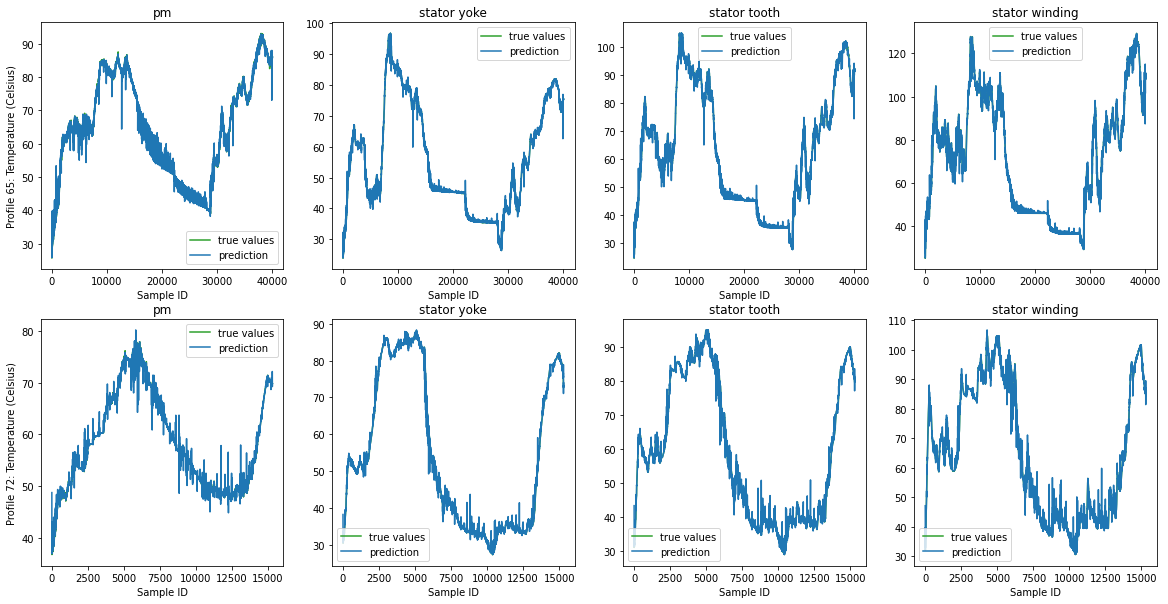

In [126]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
ax = axes[0, 0]
ax.plot(y_test_rf_65.iloc[:,0], color='tab:green', label="true values")
ax.plot(Y_pred_rf_65[:,0], color='tab:blue', label="prediction")
#ax.set_ylabel('Profile 65')
ax.set_ylabel('Profile 65: Temperature (Celsius)')
ax.set_xlabel('Sample ID')
ax.set_title("pm")
ax.legend()

ax = axes[0, 1]
ax.plot(y_test_rf_65.iloc[:,1], color='tab:green', label="true values")
ax.plot(Y_pred_rf_65[:,1], color='tab:blue', label="prediction")
#ax.set_ylabel('Temperature ')
ax.set_title("stator yoke")
ax.set_xlabel('Sample ID')
ax.legend()

ax = axes[0, 2]
ax.plot(y_test_rf_65.iloc[:,2], color='tab:green', label="true values")
ax.plot(Y_pred_rf_65[:,2], color='tab:blue', label="prediction")
#ax.set_ylabel('Temperature ')
ax.set_xlabel('Sample ID')
ax.set_title("stator tooth")
ax.legend()

ax = axes[0, 3]
ax.plot(y_test_rf_65.iloc[:,3], color='tab:green', label="true values")
ax.plot(Y_pred_rf_65[:,3], color='tab:blue', label="prediction")
#ax.set_ylabel('Temperature ')
ax.set_title("stator winding")
ax.legend()

ax = axes[1, 0]
ax.plot(y_test_rf_72.iloc[:,0], color='tab:green', label="true values")
ax.plot(Y_pred_rf_72[:,0], color='tab:blue', label="prediction")
#ax.set_ylabel('Profile 72')
ax.set_xlabel('Sample ID')
ax.set_ylabel('Profile 72: Temperature (Celsius)')
ax.set_title("pm")
ax.legend()

ax = axes[1, 1]
ax.plot(y_test_rf_72.iloc[:,1], color='tab:green', label="true values")
ax.plot(Y_pred_rf_72[:,1], color='tab:blue', label="prediction")
#ax.set_ylabel('Temperature ')
ax.set_xlabel('Sample ID')
ax.set_title("stator yoke")
ax.legend()

ax = axes[1, 2]
ax.plot(y_test_rf_72.iloc[:,2], color='tab:green', label="true values")
ax.plot(Y_pred_rf_72[:,2], color='tab:blue', label="prediction")
#ax.set_ylabel('Temperature ')
ax.set_xlabel('Sample ID')
ax.set_title("stator tooth")
ax.legend()

ax = axes[1, 3]
ax.plot(y_test_rf_72.iloc[:,3], color='tab:green', label="true values")
ax.plot(Y_pred_rf_72[:,3], color='tab:blue', label="prediction")
#ax.set_ylabel('Temperature ')
ax.set_xlabel('Sample ID')
ax.set_title("stator winding")
ax.legend()
#ax.set_xlabel('Prediction vs Actual: x,y axes represent test set sample IDs and the temperature readings in Celsius', fontsize=20)

# Models Comparison

## Overall Average R Squared for different models

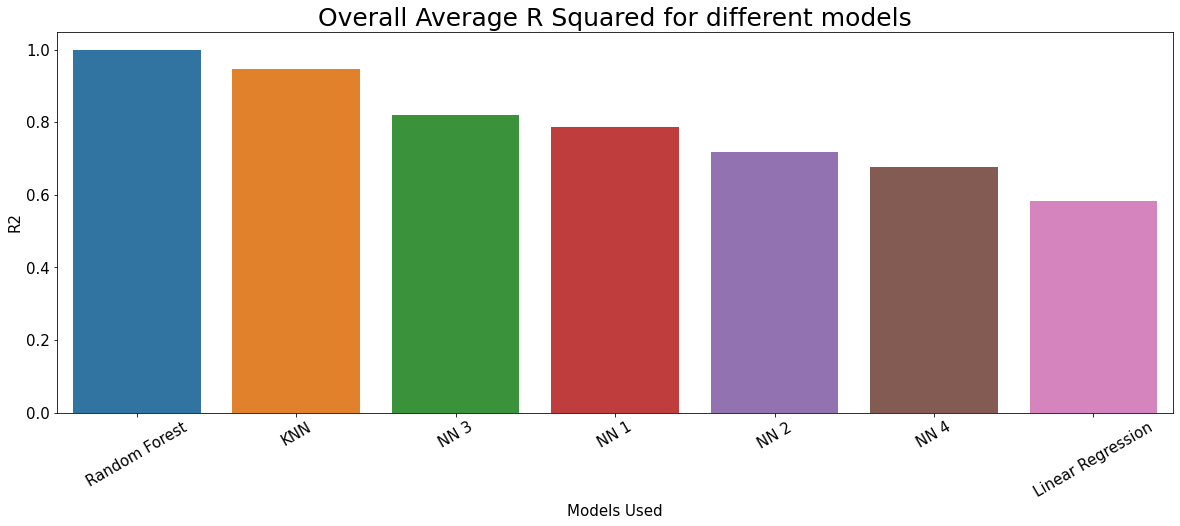

In [218]:
df = {'NN 1': cnn_model_R2, 'NN 2': cnn_model_2_R2, 'NN 3': cnn_model_3_R2, 'NN 4': nn_model_4_R2, 
        'Linear Regression': r2_lin, 'KNN': r2_knn, 'Random Forest': r2_rf }
df = dict(sorted(df.items(), key = lambda x: x[1], reverse = True))
models = list(df.keys())
R2 = list(df.values())
fig = plt.figure(figsize = (20, 7))
sns.barplot(x = models, y = R2)
plt.xlabel("Models Used", size = 15)
plt.xticks(rotation = 30, size = 15)
plt.ylabel("R2", size = 15)
plt.yticks(size = 15)
plt.title("Overall Average R Squared for different models", size = 25)
plt.show()

## Profile 65 - R Squared Performance

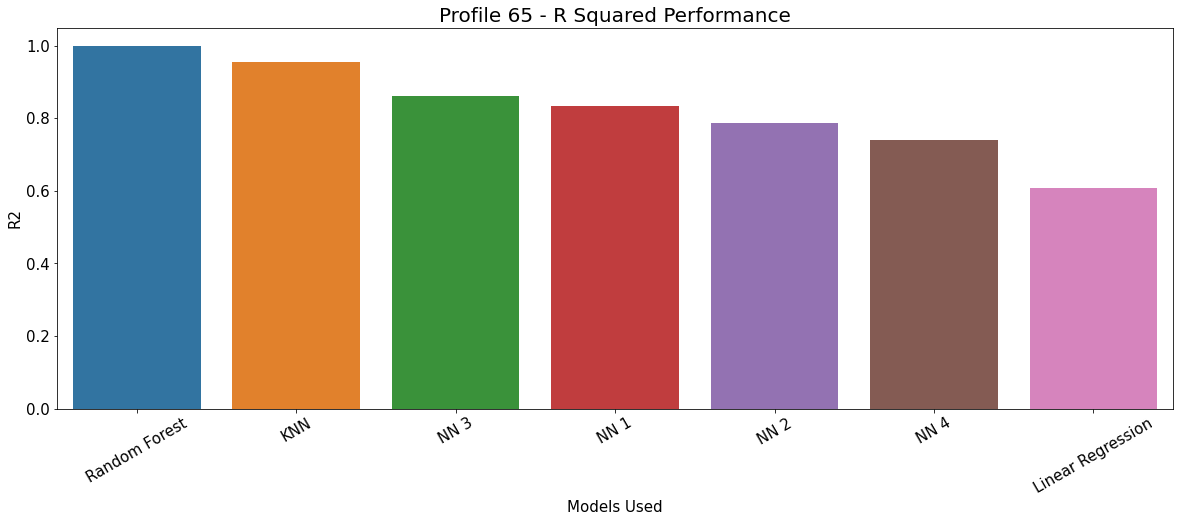

In [216]:
df = {'NN 1': r2_NN_65, 'NN 2': r2_NN2_65, 'NN 3': r2_65, 'NN 4': r2_NN4_65, 
        'Linear Regression': r2_lin_65, 'KNN': r2_knn_65, 'Random Forest': r2_rf_65 }
df = dict(sorted(df.items(), key = lambda x: x[1], reverse = True))
models = list(df.keys())
R2 = list(df.values())
fig = plt.figure(figsize = (20, 7))
sns.barplot(x = models, y = R2)
plt.xlabel("Models Used", size = 15)
plt.xticks(rotation = 30, size = 15)
plt.ylabel("R2", size = 15)
plt.yticks(size = 15)
plt.title("Profile 65 - R Squared Performance", size = 20)
plt.show()

## Profile 72 - R Squared Performance

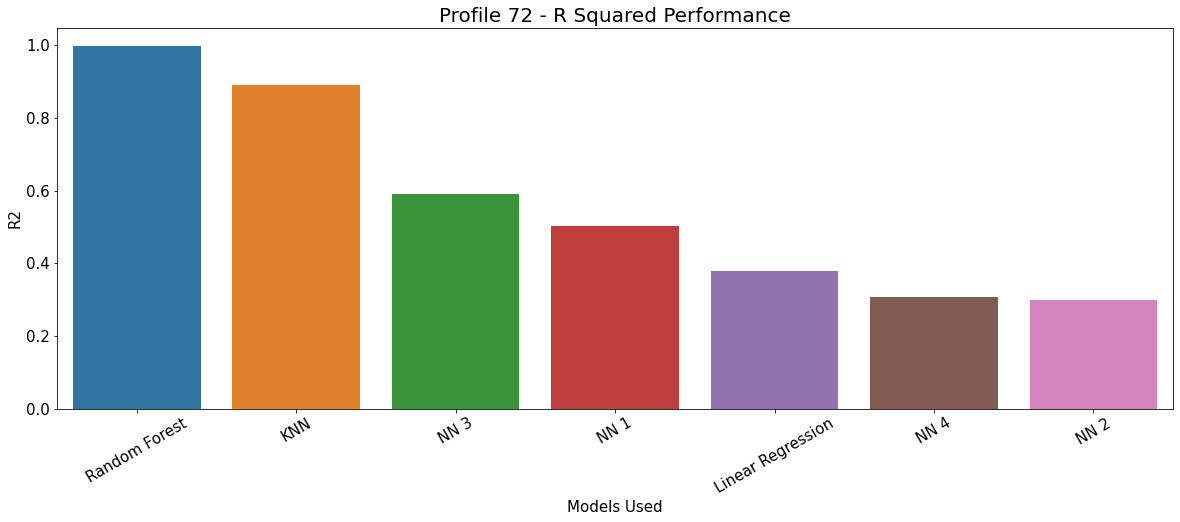

In [215]:
df = {'NN 1': r2_NN_72, 'NN 2': r2_NN2_72, 'NN 3': r2_72, 'NN 4': r2_NN4_72, 
        'Linear Regression': r2_lin_72, 'KNN': r2_knn_72, 'Random Forest': r2_rf_72 }
df = dict(sorted(df.items(), key = lambda x: x[1], reverse = True))
models = list(df.keys())
R2 = list(df.values())
fig = plt.figure(figsize = (20, 7))
sns.barplot(x = models, y = R2)
plt.xlabel("Models Used", size = 15)
plt.xticks(rotation = 30, size = 15)
plt.ylabel("R2", size = 15)
plt.yticks(size = 15)
plt.title("Profile 72 - R Squared Performance", size = 20)
plt.show()